## Features Explanation

- **id**: Unique identifier for each record.
- **dur**: Duration of the connection (in seconds).
- **proto**: Protocol type of the connection (e.g., tcp, udp).
- **service**: Network service on the destination (e.g., http, ftp; "-" if not applicable).
- **state**: Status of the connection (e.g., FIN for normal termination).
- **spkts**: Number of source packets during the connection.
- **dpkts**: Number of destination packets during the connection.
- **sbytes**: Total bytes from source to destination.
- **dbytes**: Total bytes from destination to source.
- **rate**: Transmission rate (packets/second).
- **sttl**: Source to destination time to live value.
- **dttl**: Destination to source time to live value.
- **sload**: Source bits per second.
- **dload**: Destination bits per second.
- **sloss**: Source packet retransmissions or losses.
- **dloss**: Destination packet retransmissions or losses.
- **sinpkt**: Time between two packets sent from the source.
- **dinpkt**: Time between two packets sent from the destination.
- **sjit**: Source jitter (variation in time delay).
- **djit**: Destination jitter (variation in time delay).
- **swin**: Source window size.
- **stcpb**: Source TCP base sequence number.
- **dtcpb**: Destination TCP base sequence number.
- **dwin**: Destination window size.
- **tcprtt**: Round trip time of the TCP connection.
- **synack**: The time between the SYN and the ACK packets.
- **ackdat**: The time between the ACK packet and the data packet.
- **smean**: Mean of the packet size transmitted by the source.
- **dmean**: Mean of the packet size transmitted by the destination.
- **trans_depth**: Represents the depth into the connection of the packet.
- **response_body_len**: Actual data payload in the response packets.
- **ct_srv_src**: Count of connections that have the same service (port number) as the current connection in the past 100 connections to the same service.
- **ct_state_ttl**: Number of connections that have the same source or destination in the past 100 connections that have the same state and are directed to the same destination port number.
- **ct_dst_ltm**: Number of connections to the same destination in the past 100 connections.
- **ct_src_dport_ltm**: Number of connections to the same source and destination port in the past 100 connections.
- **ct_dst_sport_ltm**: Number of connections to the same destination and source port in the past 100 connections.
- **ct_dst_src_ltm**: Number of connections from the same source to the same destination in the past 100 connections.
- **is_ftp_login**: Indicates if the FTP session is logged in (1 if true, 0 if false).
- **ct_ftp_cmd**: Count of FTP commands in the session.
- **ct_flw_http_mthd**: Number of HTTP methods seen in the session.
- **ct_src_ltm**: Number of connections from the same source IP in the past 100 connections.
- **ct_srv_dst**: Number of connections to the same service (port number) on the destination IP in the past 100 connections.
- **is_sm_ips_ports**: Indicates if the source and destination IP are the same and if the source and destination ports are 0.

## Target Prediction

- **attack_cat**: Category of the attack (e.g., DoS, Worms, Backdoors) or 'Normal' for non-attack records.
- **label**: Binary classification; 0 for normal and 1 for attack.


In [2]:
import pandas as pd
df_train = pd.read_csv("UNSW_NB15_training-set.csv")
df_test = pd.read_csv("UNSW_NB15_testing-set.csv")

In [3]:
for column in df_train.columns:
    if df_train[column].dtype != 'object':
        print(column)
        print(df_train[column].describe())
        print("\n")

id
count    175341.000000
mean      87671.000000
std       50616.731112
min           1.000000
25%       43836.000000
50%       87671.000000
75%      131506.000000
max      175341.000000
Name: id, dtype: float64


dur
count    175341.000000
mean          1.359389
std           6.480249
min           0.000000
25%           0.000008
50%           0.001582
75%           0.668069
max          59.999989
Name: dur, dtype: float64


spkts
count    175341.000000
mean         20.298664
std         136.887597
min           1.000000
25%           2.000000
50%           2.000000
75%          12.000000
max        9616.000000
Name: spkts, dtype: float64


dpkts
count    175341.000000
mean         18.969591
std         110.258271
min           0.000000
25%           0.000000
50%           2.000000
75%          10.000000
max       10974.000000
Name: dpkts, dtype: float64


sbytes
count    1.753410e+05
mean     8.844844e+03
std      1.747656e+05
min      2.800000e+01
25%      1.140000e+02
50%      4.30

In [4]:
for column in df_test.columns:
    if df_test[column].dtype != 'object':
        print(column)
        print(df_test[column].describe())
        print("\n")

id
count    82332.000000
mean     41166.500000
std      23767.345519
min          1.000000
25%      20583.750000
50%      41166.500000
75%      61749.250000
max      82332.000000
Name: id, dtype: float64


dur
count    82332.000000
mean         1.006756
std          4.710444
min          0.000000
25%          0.000008
50%          0.014138
75%          0.719360
max         59.999989
Name: dur, dtype: float64


spkts
count    82332.000000
mean        18.666472
std        133.916353
min          1.000000
25%          2.000000
50%          6.000000
75%         12.000000
max      10646.000000
Name: spkts, dtype: float64


dpkts
count    82332.000000
mean        17.545936
std        115.574086
min          0.000000
25%          0.000000
50%          2.000000
75%         10.000000
max      11018.000000
Name: dpkts, dtype: float64


sbytes
count    8.233200e+04
mean     7.993908e+03
std      1.716423e+05
min      2.400000e+01
25%      1.140000e+02
50%      5.340000e+02
75%      1.280000e+03
m

In [5]:
from sklearn.preprocessing import RobustScaler

numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.difference(['id','label'])

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the numeric columns
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])

df_train

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.179469,tcp,-,FIN,0.4,0.2,-0.131902,0.007260,-0.025220,...,0.0,-0.181818,0.0,0.0,0.0,-0.285714,-0.3,0.0,Normal,0
1,2,0.970450,tcp,-,FIN,1.2,3.6,0.233129,37.976407,-0.025185,...,0.0,-0.090909,0.0,0.0,0.0,-0.285714,0.2,0.0,Normal,0
2,3,2.427244,tcp,-,FIN,0.6,1.4,-0.050613,11.816697,-0.025700,...,0.0,0.000000,0.0,0.0,0.0,-0.142857,0.2,0.0,Normal,0
3,4,2.514830,tcp,ftp,FIN,1.0,1.0,0.151840,0.549909,-0.025704,...,0.0,0.000000,1.0,1.0,0.0,-0.142857,-0.3,0.0,Normal,0
4,5,0.670406,tcp,-,FIN,0.8,0.4,0.079755,0.094374,-0.025546,...,0.0,3.363636,0.0,0.0,0.0,-0.142857,3.5,0.0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,-0.002355,udp,dns,INT,0.0,-0.2,-0.242331,-0.148820,0.863309,...,6.0,1.909091,0.0,0.0,0.0,3.000000,2.0,0.0,Generic,1
175337,175338,0.754692,tcp,-,FIN,0.8,0.6,0.145706,0.172414,-0.025544,...,0.0,-0.090909,0.0,0.0,0.0,-0.285714,-0.3,0.0,Shellcode,1
175338,175339,-0.002355,udp,dns,INT,0.0,-0.2,-0.242331,-0.148820,0.863309,...,1.0,0.909091,0.0,0.0,0.0,0.000000,0.8,0.0,Generic,1
175339,175340,-0.002355,udp,dns,INT,0.0,-0.2,-0.242331,-0.148820,0.863309,...,6.5,2.454545,0.0,0.0,0.0,3.857143,2.6,0.0,Generic,1


In [6]:
numeric_cols = df_test.select_dtypes(include=['int64', 'float64']).columns.difference(['id','label'])

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the numeric columns
df_test[numeric_cols] = scaler.fit_transform(df_test[numeric_cols])

In [7]:
from sklearn.preprocessing import LabelEncoder

string_cols = df_train.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Initialize a dictionary to store the mappings
label_mappings = {}

# Encode the string columns using label encoding
for col in string_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [8]:
label_mappings

{'proto': {'3pc': 0,
  'a/n': 1,
  'aes-sp3-d': 2,
  'any': 3,
  'argus': 4,
  'aris': 5,
  'arp': 6,
  'ax.25': 7,
  'bbn-rcc': 8,
  'bna': 9,
  'br-sat-mon': 10,
  'cbt': 11,
  'cftp': 12,
  'chaos': 13,
  'compaq-peer': 14,
  'cphb': 15,
  'cpnx': 16,
  'crtp': 17,
  'crudp': 18,
  'dcn': 19,
  'ddp': 20,
  'ddx': 21,
  'dgp': 22,
  'egp': 23,
  'eigrp': 24,
  'emcon': 25,
  'encap': 26,
  'etherip': 27,
  'fc': 28,
  'fire': 29,
  'ggp': 30,
  'gmtp': 31,
  'gre': 32,
  'hmp': 33,
  'i-nlsp': 34,
  'iatp': 35,
  'ib': 36,
  'icmp': 37,
  'idpr': 38,
  'idpr-cmtp': 39,
  'idrp': 40,
  'ifmp': 41,
  'igmp': 42,
  'igp': 43,
  'il': 44,
  'ip': 45,
  'ipcomp': 46,
  'ipcv': 47,
  'ipip': 48,
  'iplt': 49,
  'ipnip': 50,
  'ippc': 51,
  'ipv6': 52,
  'ipv6-frag': 53,
  'ipv6-no': 54,
  'ipv6-opts': 55,
  'ipv6-route': 56,
  'ipx-n-ip': 57,
  'irtp': 58,
  'isis': 59,
  'iso-ip': 60,
  'iso-tp4': 61,
  'kryptolan': 62,
  'l2tp': 63,
  'larp': 64,
  'leaf-1': 65,
  'leaf-2': 66,
  'merit

In [9]:
from sklearn.preprocessing import LabelEncoder

string_cols = df_test.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Initialize a dictionary to store the mappings
label_mappings = {}

# Encode the string columns using label encoding
for col in string_cols:
    df_test[col] = label_encoder.fit_transform(df_test[col])
    label_mappings[col] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [10]:
import random
import numpy as np
from tqdm import tqdm
from deap import base, creator, tools, algorithms
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from concurrent.futures import ThreadPoolExecutor

X_train = df_train.drop(['label', 'attack_cat', 'id'], axis=1)  #
y_train = df_train['attack_cat']  

X_test = df_test.drop(['label', 'attack_cat', 'id'], axis=1)  
y_test = df_test['attack_cat']

# Define the fitness function
def eval_features(individual):
    features = [index for index, bit in enumerate(individual) if bit == 1]
    if not features:
        return 0,  # Large penalty if no features are selected
    
    X_train_selected = X_train.iloc[:, features]
    X_test_selected = X_test.iloc[:, features]
    clf = RandomForestClassifier(n_estimators=10, random_state=42)
    clf.fit(X_train_selected, y_train)
    
    predictions = clf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy,

# Setup the genetic algorithm
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", lambda: random.randint(0, 1))  # Use random initialization of 0s and 1s
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=len(X_train.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", eval_features)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Function to run the genetic algorithm with threading and print generation fitness
def run_ga():
    population = toolbox.population(n=50)
    NGEN = 40
    pbar = tqdm(total=NGEN, desc="Evolving Generations")
    gen_fitness = []

    for gen in range(NGEN):
        with ThreadPoolExecutor(max_workers=12) as executor:
            offspring = list(executor.map(toolbox.clone, population))
            offspring = algorithms.varAnd(offspring, toolbox, cxpb=0.5, mutpb=0.2)

        fits = list(map(toolbox.evaluate, offspring))
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit
        
        population = toolbox.select(offspring, k=len(population))
        gen_fitness.append(np.mean([ind.fitness.values[0] for ind in population]))
        pbar.update(1)
        print(f"Generation {gen+1}: Avg Fitness = {gen_fitness[-1]:.4f}")

    pbar.close()
    return population, gen_fitness

# Run the genetic algorithm
final_population, generation_fitness = run_ga()

# Extract the best individual
top1 = tools.selBest(final_population, k=1)[0]
print("Selected Features Index:", [index for index, bit in enumerate(top1) if bit == 1])
print("Best Fitness:", eval_features(top1)[0])


Evolving Generations:   2%|▎         | 1/40 [01:44<1:08:04, 104.73s/it]

Generation 1: Avg Fitness = 0.6194


Evolving Generations:   5%|▌         | 2/40 [03:21<1:03:11, 99.77s/it] 

Generation 2: Avg Fitness = 0.6414


Evolving Generations:   8%|▊         | 3/40 [05:02<1:02:05, 100.69s/it]

Generation 3: Avg Fitness = 0.6656


Evolving Generations:  10%|█         | 4/40 [06:43<1:00:18, 100.51s/it]

Generation 4: Avg Fitness = 0.6817


Evolving Generations:  12%|█▎        | 5/40 [08:13<56:36, 97.04s/it]   

Generation 5: Avg Fitness = 0.6862


Evolving Generations:  15%|█▌        | 6/40 [09:44<53:45, 94.87s/it]

Generation 6: Avg Fitness = 0.6930


Evolving Generations:  18%|█▊        | 7/40 [11:11<50:49, 92.41s/it]

Generation 7: Avg Fitness = 0.6992


Evolving Generations:  20%|██        | 8/40 [12:39<48:30, 90.95s/it]

Generation 8: Avg Fitness = 0.6995


Evolving Generations:  22%|██▎       | 9/40 [14:06<46:22, 89.75s/it]

Generation 9: Avg Fitness = 0.7032


Evolving Generations:  25%|██▌       | 10/40 [15:32<44:10, 88.33s/it]

Generation 10: Avg Fitness = 0.7063


Evolving Generations:  28%|██▊       | 11/40 [16:54<41:46, 86.42s/it]

Generation 11: Avg Fitness = 0.7079


Evolving Generations:  30%|███       | 12/40 [18:17<39:53, 85.50s/it]

Generation 12: Avg Fitness = 0.7118


Evolving Generations:  32%|███▎      | 13/40 [19:39<37:56, 84.33s/it]

Generation 13: Avg Fitness = 0.7144


Evolving Generations:  35%|███▌      | 14/40 [21:00<36:09, 83.45s/it]

Generation 14: Avg Fitness = 0.7168


Evolving Generations:  38%|███▊      | 15/40 [22:18<34:05, 81.80s/it]

Generation 15: Avg Fitness = 0.7195


Evolving Generations:  40%|████      | 16/40 [23:34<32:02, 80.11s/it]

Generation 16: Avg Fitness = 0.7203


Evolving Generations:  42%|████▎     | 17/40 [24:51<30:19, 79.10s/it]

Generation 17: Avg Fitness = 0.7208


Evolving Generations:  45%|████▌     | 18/40 [26:12<29:10, 79.57s/it]

Generation 18: Avg Fitness = 0.7221


Evolving Generations:  48%|████▊     | 19/40 [27:31<27:47, 79.40s/it]

Generation 19: Avg Fitness = 0.7243


Evolving Generations:  50%|█████     | 20/40 [28:49<26:22, 79.15s/it]

Generation 20: Avg Fitness = 0.7250


Evolving Generations:  52%|█████▎    | 21/40 [30:10<25:14, 79.69s/it]

Generation 21: Avg Fitness = 0.7250


Evolving Generations:  55%|█████▌    | 22/40 [31:33<24:11, 80.63s/it]

Generation 22: Avg Fitness = 0.7253


Evolving Generations:  57%|█████▊    | 23/40 [32:52<22:44, 80.29s/it]

Generation 23: Avg Fitness = 0.7257


Evolving Generations:  60%|██████    | 24/40 [34:15<21:35, 80.97s/it]

Generation 24: Avg Fitness = 0.7258


Evolving Generations:  62%|██████▎   | 25/40 [35:33<20:00, 80.03s/it]

Generation 25: Avg Fitness = 0.7252


Evolving Generations:  65%|██████▌   | 26/40 [36:50<18:29, 79.24s/it]

Generation 26: Avg Fitness = 0.7262


Evolving Generations:  68%|██████▊   | 27/40 [38:06<16:56, 78.23s/it]

Generation 27: Avg Fitness = 0.7263


Evolving Generations:  70%|███████   | 28/40 [39:23<15:34, 77.91s/it]

Generation 28: Avg Fitness = 0.7263


Evolving Generations:  72%|███████▎  | 29/40 [40:39<14:10, 77.32s/it]

Generation 29: Avg Fitness = 0.7263


Evolving Generations:  75%|███████▌  | 30/40 [41:55<12:48, 76.80s/it]

Generation 30: Avg Fitness = 0.7263


Evolving Generations:  78%|███████▊  | 31/40 [43:10<11:27, 76.42s/it]

Generation 31: Avg Fitness = 0.7263


Evolving Generations:  80%|████████  | 32/40 [44:28<10:13, 76.69s/it]

Generation 32: Avg Fitness = 0.7263


Evolving Generations:  82%|████████▎ | 33/40 [45:44<08:56, 76.59s/it]

Generation 33: Avg Fitness = 0.7263


Evolving Generations:  85%|████████▌ | 34/40 [47:01<07:39, 76.58s/it]

Generation 34: Avg Fitness = 0.7263


Evolving Generations:  88%|████████▊ | 35/40 [48:19<06:26, 77.20s/it]

Generation 35: Avg Fitness = 0.7263


Evolving Generations:  90%|█████████ | 36/40 [49:37<05:09, 77.37s/it]

Generation 36: Avg Fitness = 0.7263


Evolving Generations:  92%|█████████▎| 37/40 [50:54<03:51, 77.24s/it]

Generation 37: Avg Fitness = 0.7261


Evolving Generations:  95%|█████████▌| 38/40 [52:10<02:34, 77.02s/it]

Generation 38: Avg Fitness = 0.7263


Evolving Generations:  98%|█████████▊| 39/40 [53:27<01:16, 76.85s/it]

Generation 39: Avg Fitness = 0.7263


Evolving Generations: 100%|██████████| 40/40 [54:44<00:00, 82.12s/it]


Generation 40: Avg Fitness = 0.7263
Selected Features Index: [0, 1, 2, 3, 5, 9, 10, 14, 16, 17, 18, 19, 27, 31, 32, 34, 38, 40, 41]
Best Fitness: 0.7263396978088714


In [11]:
selected_features_index = [0, 1, 2, 3, 5, 9, 10, 14, 16, 17, 18, 19, 27, 31, 32, 34, 38, 40, 41]
selected_features = [df_train.columns[i] for i in selected_features_index]

# Add 'id', 'attack_cat', and 'label' to the list of selected features
selected_features.extend(['id', 'attack_cat', 'label'])

# Create a new DataFrame with the selected features
df_selected = df_train[selected_features]
df_selected

,id,dur,proto,service,spkts,rate,sttl,sloss,sinpkt,dinpkt,...,smean,ct_srv_src,ct_state_ttl,ct_src_dport_ltm,ct_ftp_cmd,ct_src_ltm,ct_srv_dst,id,attack_cat,label
0,1,0.179469,113,0,0.4,-0.025220,-0.010417,0.000000,0.435473,0.163928,...,-0.697674,-0.4,-1.0,0.00,0.0,-0.285714,-0.3,1,6,0
1,2,0.970450,113,0,1.2,-0.025185,-1.000000,0.666667,0.900023,0.302174,...,-0.488372,3.8,0.0,0.00,0.0,-0.285714,0.2,2,6,0
2,3,2.427244,113,0,0.6,-0.025700,-1.000000,0.333333,4.199465,2.012246,...,-0.627907,0.2,0.0,0.00,0.0,-0.142857,0.2,3,6,0
3,4,2.514830,113,3,1.0,-0.025704,-1.000000,0.333333,2.766997,1.767374,...,-0.488372,-0.4,0.0,0.00,1.0,-0.142857,-0.3,4,6,0
4,5,0.670406,113,0,0.8,-0.025546,0.000000,0.666667,0.860772,1.481864,...,-0.465116,3.8,0.0,0.25,0.0,-0.142857,3.5,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,-0.002355,119,2,0.0,0.863309,0.000000,0.000000,-0.004909,-0.000118,...,-0.372093,1.9,1.0,5.75,0.0,3.000000,2.0,175337,5,1
175337,175338,0.754692,113,0,0.8,-0.025544,0.000000,0.666667,0.981350,1.311864,...,-0.255814,-0.4,0.0,0.00,0.0,-0.285714,-0.3,175338,8,1
175338,175339,-0.002355,119,2,0.0,0.863309,0.000000,0.000000,-0.004909,-0.000118,...,-0.372093,0.7,1.0,0.50,0.0,0.000000,0.8,175339,5,1
175339,175340,-0.002355,119,2,0.0,0.863309,0.000000,0.000000,-0.004909,-0.000118,...,-0.372093,2.5,1.0,7.25,0.0,3.857143,2.6,175340,5,1


In [12]:
df_train.to_csv("checking.csv", index=False)

In [40]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [28]:
X_train = df_train.drop(['label', 'attack_cat', 'id'], axis=1)  #
y_train = df_train['label']  

X_test = df_test.drop(['label', 'attack_cat', 'id'], axis=1)  
y_test = df_test['label']

/home/hashim/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/hashim/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
Generation:   2%|▎         | 1/40 [00:42<27:23, 42.14s/it]

Generation 1, Best individual fitness: 0.7746076859544284
max_depth: 42
min_samples_split: 16
min_samples_leaf: 82


Generation:   5%|▌         | 2/40 [01:23<26:34, 41.96s/it]

Generation 2, Best individual fitness: 0.7762716805130447
max_depth: 15
min_samples_split: 9
min_samples_leaf: 82


Generation:   8%|▊         | 3/40 [02:05<25:41, 41.67s/it]

Generation 3, Best individual fitness: 0.7762716805130447
max_depth: 15
min_samples_split: 14
min_samples_leaf: 82


Generation:  10%|█         | 4/40 [02:46<24:50, 41.39s/it]

Generation 4, Best individual fitness: 0.7769639994169946
max_depth: 15
min_samples_split: 31
min_samples_leaf: 84


Generation:  12%|█▎        | 5/40 [03:27<24:01, 41.19s/it]

Generation 5, Best individual fitness: 0.7769639994169946
max_depth: 15
min_samples_split: 31
min_samples_leaf: 84


Generation:  15%|█▌        | 6/40 [04:07<23:17, 41.09s/it]

Generation 6, Best individual fitness: 0.7769639994169946
max_depth: 15
min_samples_split: 28
min_samples_leaf: 84
Restarting due to stagnant fitness...


Generation:  18%|█▊        | 7/40 [04:49<22:40, 41.22s/it]

Generation 7, Best individual fitness: 0.7769639994169946
max_depth: 15
min_samples_split: 28
min_samples_leaf: 84


Generation:  20%|██        | 8/40 [05:31<22:02, 41.34s/it]

Generation 8, Best individual fitness: 0.7769639994169946
max_depth: 15
min_samples_split: 28
min_samples_leaf: 84


Generation:  22%|██▎       | 9/40 [06:13<21:34, 41.75s/it]

Generation 9, Best individual fitness: 0.7769639994169946
max_depth: 15
min_samples_split: 28
min_samples_leaf: 84
Restarting due to stagnant fitness...


Generation:  25%|██▌       | 10/40 [06:56<21:03, 42.13s/it]

Generation 10, Best individual fitness: 0.7769639994169946
max_depth: 15
min_samples_split: 28
min_samples_leaf: 84


Generation:  28%|██▊       | 11/40 [07:44<21:11, 43.84s/it]

Generation 11, Best individual fitness: 0.7769639994169946
max_depth: 15
min_samples_split: 24
min_samples_leaf: 84


Generation:  30%|███       | 12/40 [08:28<20:30, 43.96s/it]

Generation 12, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 9
min_samples_leaf: 82


Generation:  32%|███▎      | 13/40 [09:13<19:50, 44.08s/it]

Generation 13, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 27
min_samples_leaf: 82


Generation:  35%|███▌      | 14/40 [09:56<19:04, 44.01s/it]

Generation 14, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 27
min_samples_leaf: 82
Restarting due to stagnant fitness...


Generation:  38%|███▊      | 15/40 [10:38<18:01, 43.24s/it]

Generation 15, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 27
min_samples_leaf: 82


Generation:  40%|████      | 16/40 [11:19<17:01, 42.56s/it]

Generation 16, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 27
min_samples_leaf: 82


Generation:  42%|████▎     | 17/40 [12:00<16:08, 42.12s/it]

Generation 17, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 27
min_samples_leaf: 82
Restarting due to stagnant fitness...


Generation:  45%|████▌     | 18/40 [12:41<15:20, 41.84s/it]

Generation 18, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 27
min_samples_leaf: 82


Generation:  48%|████▊     | 19/40 [13:23<14:37, 41.77s/it]

Generation 19, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 27
min_samples_leaf: 82


Generation:  50%|█████     | 20/40 [14:04<13:53, 41.69s/it]

Generation 20, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 36
min_samples_leaf: 82
Restarting due to stagnant fitness...


Generation:  52%|█████▎    | 21/40 [14:45<13:08, 41.49s/it]

Generation 21, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 36
min_samples_leaf: 82


Generation:  55%|█████▌    | 22/40 [15:27<12:25, 41.44s/it]

Generation 22, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 36
min_samples_leaf: 82


Generation:  57%|█████▊    | 23/40 [16:06<11:36, 40.98s/it]

Generation 23, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 36
min_samples_leaf: 82
Restarting due to stagnant fitness...


Generation:  60%|██████    | 24/40 [16:47<10:54, 40.92s/it]

Generation 24, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 36
min_samples_leaf: 82


Generation:  62%|██████▎   | 25/40 [17:28<10:15, 41.00s/it]

Generation 25, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 36
min_samples_leaf: 82


Generation:  65%|██████▌   | 26/40 [18:10<09:34, 41.02s/it]

Generation 26, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 39
min_samples_leaf: 82
Restarting due to stagnant fitness...


Generation:  68%|██████▊   | 27/40 [18:51<08:55, 41.19s/it]

Generation 27, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 39
min_samples_leaf: 82


Generation:  70%|███████   | 28/40 [19:33<08:15, 41.26s/it]

Generation 28, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 39
min_samples_leaf: 82


Generation:  72%|███████▎  | 29/40 [20:13<07:32, 41.17s/it]

Generation 29, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 39
min_samples_leaf: 82
Restarting due to stagnant fitness...


Generation:  75%|███████▌  | 30/40 [20:55<06:52, 41.20s/it]

Generation 30, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 39
min_samples_leaf: 82


Generation:  78%|███████▊  | 31/40 [21:36<06:10, 41.14s/it]

Generation 31, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 39
min_samples_leaf: 82


Generation:  80%|████████  | 32/40 [22:16<05:26, 40.82s/it]

Generation 32, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 39
min_samples_leaf: 82
Restarting due to stagnant fitness...


Generation:  82%|████████▎ | 33/40 [22:57<04:47, 41.02s/it]

Generation 33, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 39
min_samples_leaf: 82


Generation:  85%|████████▌ | 34/40 [23:38<04:06, 41.03s/it]

Generation 34, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 39
min_samples_leaf: 82


Generation:  88%|████████▊ | 35/40 [24:20<03:25, 41.09s/it]

Generation 35, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 39
min_samples_leaf: 82
Restarting due to stagnant fitness...


Generation:  90%|█████████ | 36/40 [25:00<02:44, 41.03s/it]

Generation 36, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 45
min_samples_leaf: 82


Generation:  92%|█████████▎| 37/40 [25:43<02:04, 41.33s/it]

Generation 37, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 45
min_samples_leaf: 82


Generation:  95%|█████████▌| 38/40 [26:25<01:23, 41.55s/it]

Generation 38, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 41
min_samples_leaf: 82
Restarting due to stagnant fitness...


Generation:  98%|█████████▊| 39/40 [27:09<00:42, 42.39s/it]

Generation 39, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 41
min_samples_leaf: 82


Generation: 100%|██████████| 40/40 [27:54<00:00, 41.86s/it]

Generation 40, Best individual fitness: 0.7778263615605111
max_depth: 17
min_samples_split: 41
min_samples_leaf: 82
Best Individual: [17, 41, 82]
Best Fitness: 0.7778263615605111


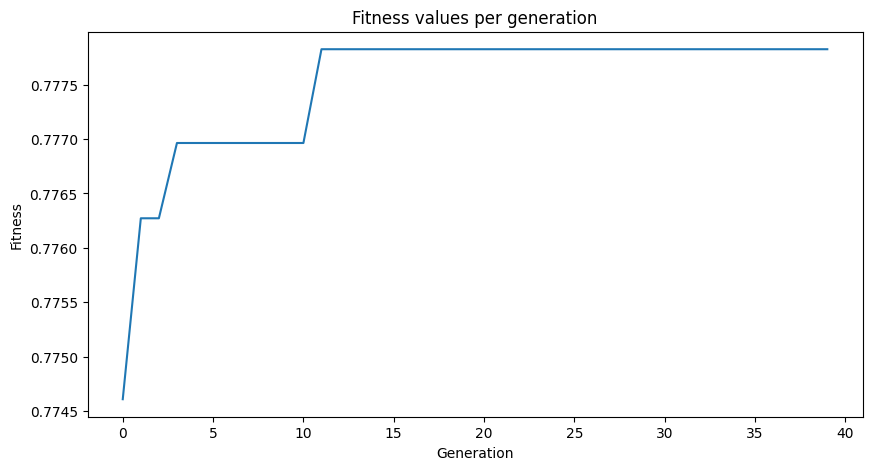

In [48]:
import concurrent.futures

# Set up the environment and definitions for DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generators for the hyperparameters
toolbox.register("max_depth", random.randint, 10, 100)  # Tree depth from 10 to 100
toolbox.register("min_samples_split", random.randint, 8, 50)  # Min samples split from 8 to 50
toolbox.register("min_samples_leaf", random.randint, 50, 150)  # Min samples leaf from 50 to 150

# Structure initializers
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.max_depth, toolbox.min_samples_split, toolbox.min_samples_leaf), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function
def eval_decision_tree(individual):
    max_depth, min_samples_split, min_samples_leaf = individual
    model = DecisionTreeClassifier(max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy,

toolbox.register("evaluate", eval_decision_tree)
toolbox.register("mate", tools.cxTwoPoint)  # Two-point crossover
toolbox.register("mutate", tools.mutUniformInt, low=[10, 8, 50], up=[100, 50, 150], indpb=0.8)
toolbox.register("select", tools.selTournament, tournsize=30)

# Initialize population
population = toolbox.population(n=100)  # Increased population
NGEN = 40
best_fitnesses = []

# Function to perform evolutionary operations and manage restarts
def perform_evolutionary_operations(population):
    stagnant_generations = 0
    best_fitness = 0

    with concurrent.futures.ThreadPoolExecutor() as executor:
        for gen in tqdm(range(NGEN), desc="Generation"):
            offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=0.8)
            fits = list(executor.map(toolbox.evaluate, offspring))
            for fit, ind in zip(fits, offspring):
                ind.fitness.values = fit

            # Elitism: Keep the best individual from the previous generation
            best = tools.selBest(population, 1)[0]
            population = toolbox.select(offspring, k=len(population) - 1) + [best]
            
            current_best = tools.selBest(population, 1)[0]
            best_fitnesses.append(current_best.fitness.values[0])
            print(f'Generation {gen+1}, Best individual fitness: {current_best.fitness.values[0]}')
            print("max_depth:", current_best[0])
            print("min_samples_split:", current_best[1])
            print("min_samples_leaf:", current_best[2])

            # Check for stagnant fitness
            if current_best.fitness.values[0] > best_fitness:
                best_fitness = current_best.fitness.values[0]
                stagnant_generations = 0
            else:
                stagnant_generations += 1

            # Restart strategy
            if stagnant_generations >= 2:
                print("Restarting due to stagnant fitness...")
                population = toolbox.population(n=len(population) - 1) + [current_best]
                best_fitness = 0
                stagnant_generations = 0

    return population

final_population = perform_evolutionary_operations(population)
top_individual = tools.selBest(final_population, k=1)[0]
print('Best Individual:', top_individual)
print('Best Fitness:', top_individual.fitness.values[0])

# Plotting the fitness values
plt.figure(figsize=(10, 5))
plt.plot(best_fitnesses)
plt.title('Fitness values per generation')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

In [51]:
import concurrent.futures

# Set up the environment and definitions for DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generators for the hyperparameters
toolbox.register("max_depth", random.randint, 10, 100)  # Tree depth from 10 to 100
toolbox.register("min_samples_split", random.randint, 8, 50)  # Min samples split from 8 to 50
toolbox.register("min_samples_leaf", random.randint, 50, 150)  # Min samples leaf from 50 to 150

# Structure initializers
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.max_depth, toolbox.min_samples_split, toolbox.min_samples_leaf), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function
def eval_decision_tree(individual):
    max_depth, min_samples_split, min_samples_leaf = individual
    model = DecisionTreeClassifier(max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   random_state=42)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy,

toolbox.register("evaluate", eval_decision_tree)
toolbox.register("mate", tools.cxTwoPoint)  # Two-point crossover
toolbox.register("mutate", tools.mutUniformInt, low=[10, 8, 50], up=[100, 50, 150], indpb=0.8)
toolbox.register("select", tools.selTournament, tournsize=30)

# Initialize population
population = toolbox.population(n=100)  # Increased population
NGEN = 40
best_fitnesses = []

# Function to perform evolutionary operations and manage restarts
def perform_evolutionary_operations(population):
    stagnant_generations = 0
    best_fitness = 0

    with concurrent.futures.ThreadPoolExecutor() as executor:
        for gen in tqdm(range(NGEN), desc="Generation"):
            offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=0.8)
            fits = list(executor.map(toolbox.evaluate, offspring))
            for fit, ind in zip(fits, offspring):
                ind.fitness.values = fit

            # Elitism: Keep the best individual from the previous generation
            best = tools.selBest(population, 1)[0]
            population = toolbox.select(offspring, k=len(population) - 1) + [best]
            
            current_best = tools.selBest(population, 1)[0]
            best_fitnesses.append(current_best.fitness.values[0])
            print(f'Generation {gen+1}, Best individual fitness: {current_best.fitness.values[0]}')
            print("max_depth:", current_best[0])
            print("min_samples_split:", current_best[1])
            print("min_samples_leaf:", current_best[2])

            # Check for stagnant fitness
            if current_best.fitness.values[0] > best_fitness:
                best_fitness = current_best.fitness.values[0]
                stagnant_generations = 0
            else:
                stagnant_generations += 1

            # Restart strategy
            if stagnant_generations >= 2:
                print("Restarting due to stagnant fitness...")
                population = toolbox.population(n=100)  # Restart with a new population
                best_fitness = 0
                stagnant_generations = 0

    return population

final_population = perform_evolutionary_operations(population)
top_individual = tools.selBest(final_population, k=1)[0]
print('Best Individual:', top_individual)
print('Best Fitness:', top_individual.fitness.values[0])

# Plotting the fitness values
plt.figure(figsize=(10, 5))
plt.plot(best_fitnesses)
plt.title('Fitness values per generation')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

/home/hashim/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/hashim/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
Generation:   2%|▎         | 1/40 [00:48<31:17, 48.13s/it]

Generation 1, Best individual fitness: 0.773453821114512
max_depth: 22
min_samples_split: 11
min_samples_leaf: 58


Generation:   5%|▌         | 2/40 [01:34<29:59, 47.36s/it]

Generation 2, Best individual fitness: 0.773453821114512
max_depth: 22
min_samples_split: 11
min_samples_leaf: 58


Generation:   8%|▊         | 3/40 [02:22<29:15, 47.45s/it]

Generation 3, Best individual fitness: 0.7754457562065783
max_depth: 12
min_samples_split: 47
min_samples_leaf: 58


Generation:  10%|█         | 4/40 [03:08<28:08, 46.90s/it]

Generation 4, Best individual fitness: 0.7754457562065783
max_depth: 12
min_samples_split: 47
min_samples_leaf: 58


Generation:  12%|█▎        | 5/40 [03:53<27:01, 46.33s/it]

Generation 5, Best individual fitness: 0.7762595345673614
max_depth: 12
min_samples_split: 38
min_samples_leaf: 63


Generation:  15%|█▌        | 6/40 [04:41<26:29, 46.75s/it]

Generation 6, Best individual fitness: 0.7762595345673614
max_depth: 12
min_samples_split: 47
min_samples_leaf: 63


Generation:  18%|█▊        | 7/40 [05:26<25:19, 46.03s/it]

Generation 7, Best individual fitness: 0.7762595345673614
max_depth: 12
min_samples_split: 49
min_samples_leaf: 63
Restarting due to stagnant fitness...


Generation:  20%|██        | 8/40 [06:13<24:43, 46.35s/it]

Generation 8, Best individual fitness: 0.7746076859544284
max_depth: 94
min_samples_split: 35
min_samples_leaf: 82


Generation:  22%|██▎       | 9/40 [07:02<24:24, 47.23s/it]

Generation 9, Best individual fitness: 0.7753971724238449
max_depth: 21
min_samples_split: 45
min_samples_leaf: 82


Generation:  25%|██▌       | 10/40 [07:48<23:25, 46.85s/it]

Generation 10, Best individual fitness: 0.7753971724238449
max_depth: 21
min_samples_split: 45
min_samples_leaf: 82


Generation:  28%|██▊       | 11/40 [08:34<22:33, 46.68s/it]

Generation 11, Best individual fitness: 0.7753971724238449
max_depth: 21
min_samples_split: 45
min_samples_leaf: 82
Restarting due to stagnant fitness...


Generation:  30%|███       | 12/40 [09:24<22:11, 47.57s/it]

Generation 12, Best individual fitness: 0.7745469562260118
max_depth: 92
min_samples_split: 30
min_samples_leaf: 85


Generation:  32%|███▎      | 13/40 [10:14<21:44, 48.33s/it]

Generation 13, Best individual fitness: 0.7772312102220279
max_depth: 12
min_samples_split: 16
min_samples_leaf: 75


Generation:  32%|███▎      | 13/40 [10:19<21:25, 47.62s/it]


KeyboardInterrupt: 

/home/hashim/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/hashim/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
Generation:   2%|▎         | 1/40 [00:03<02:12,  3.41s/it]

Generation 1, Best individual fitness: 0.5506000097167566
max_depth: 25
min_samples_split: 17
min_samples_leaf: 103
criterion: gini
splitter: best
max_features: sqrt
min_weight_fraction_leaf: 0.24373776104245753
max_leaf_nodes: 6970
min_impurity_decrease: 1.046902907356052
ccp_alpha: 2.1133431135639755


Generation:   5%|▌         | 2/40 [00:06<02:08,  3.39s/it]

Generation 2, Best individual fitness: 0.5506000097167566
max_depth: 20
min_samples_split: 41
min_samples_leaf: 54
criterion: entropy
splitter: random
max_features: sqrt
min_weight_fraction_leaf: 0.4033292208560663
max_leaf_nodes: 5636
min_impurity_decrease: 3.632428390719315
ccp_alpha: 4.180266807089124


Generation:   8%|▊         | 3/40 [00:10<02:05,  3.40s/it]

Generation 3, Best individual fitness: 0.5506000097167566
max_depth: 52
min_samples_split: 21
min_samples_leaf: 69
criterion: entropy
splitter: best
max_features: sqrt
min_weight_fraction_leaf: 0.24373776104245753
max_leaf_nodes: 5970
min_impurity_decrease: 3.9044804779263984
ccp_alpha: 2.907305730725463


Generation:  10%|█         | 4/40 [00:13<02:01,  3.39s/it]

Generation 4, Best individual fitness: 0.5506000097167566
max_depth: 22
min_samples_split: 19
min_samples_leaf: 125
criterion: entropy
splitter: random
max_features: None
min_weight_fraction_leaf: 0.009702015979534406
max_leaf_nodes: 6994
min_impurity_decrease: 3.666664190597345
ccp_alpha: 0.20659922113770157
Restarting due to stagnant fitness...


Generation:  12%|█▎        | 5/40 [00:20<02:39,  4.57s/it]

Generation 5, Best individual fitness: 0.5506000097167566
max_depth: 99
min_samples_split: 42
min_samples_leaf: 120
criterion: entropy
splitter: best
max_features: log2
min_weight_fraction_leaf: 0.45686007386438476
max_leaf_nodes: 2514
min_impurity_decrease: 4.6390174379549105
ccp_alpha: 2.4359571039098302


Generation:  15%|█▌        | 6/40 [00:26<02:58,  5.24s/it]

Generation 6, Best individual fitness: 0.5506000097167566
max_depth: 31
min_samples_split: 47
min_samples_leaf: 63
criterion: entropy
splitter: random
max_features: sqrt
min_weight_fraction_leaf: 0.3739771734847682
max_leaf_nodes: 9503
min_impurity_decrease: 3.615069298302853
ccp_alpha: 4.882850097862226


Generation:  18%|█▊        | 7/40 [00:33<03:05,  5.63s/it]

Generation 7, Best individual fitness: 0.5506000097167566
max_depth: 91
min_samples_split: 18
min_samples_leaf: 138
criterion: entropy
splitter: random
max_features: sqrt
min_weight_fraction_leaf: 0.37296494421209775
max_leaf_nodes: 6974
min_impurity_decrease: 3.777353379691717
ccp_alpha: 1.376798578193037


Generation:  20%|██        | 8/40 [00:39<03:10,  5.94s/it]

Generation 8, Best individual fitness: 0.5506000097167566
max_depth: 66
min_samples_split: 18
min_samples_leaf: 91
criterion: gini
splitter: random
max_features: sqrt
min_weight_fraction_leaf: 0.1667085568396836
max_leaf_nodes: 921
min_impurity_decrease: 3.777353379691717
ccp_alpha: 0.5098942808046386
Restarting due to stagnant fitness...


Generation:  22%|██▎       | 9/40 [00:45<03:06,  6.02s/it]

Generation 9, Best individual fitness: 0.5506000097167566
max_depth: 71
min_samples_split: 49
min_samples_leaf: 97
criterion: entropy
splitter: random
max_features: log2
min_weight_fraction_leaf: 0.3727014938715249
max_leaf_nodes: 7903
min_impurity_decrease: 0.35006487202222103
ccp_alpha: 3.5949784254192463


Generation:  25%|██▌       | 10/40 [00:51<03:00,  6.01s/it]

Generation 10, Best individual fitness: 0.5506000097167566
max_depth: 61
min_samples_split: 49
min_samples_leaf: 125
criterion: gini
splitter: best
max_features: sqrt
min_weight_fraction_leaf: 0.1974175347173196
max_leaf_nodes: 5329
min_impurity_decrease: 1.8629527498346015
ccp_alpha: 1.4174097108856003


Generation:  28%|██▊       | 11/40 [00:58<02:57,  6.13s/it]

Generation 11, Best individual fitness: 0.5506000097167566
max_depth: 16
min_samples_split: 35
min_samples_leaf: 125
criterion: gini
splitter: best
max_features: log2
min_weight_fraction_leaf: 0.2994886898999574
max_leaf_nodes: 2692
min_impurity_decrease: 0.11256240743096835
ccp_alpha: 2.8282450489539728


Generation:  30%|███       | 12/40 [01:04<02:54,  6.25s/it]

Generation 12, Best individual fitness: 0.5506000097167566
max_depth: 34
min_samples_split: 11
min_samples_leaf: 74
criterion: gini
splitter: random
max_features: sqrt
min_weight_fraction_leaf: 0.4622827621384695
max_leaf_nodes: 9766
min_impurity_decrease: 1.2911017152857274
ccp_alpha: 4.752098381250156
Restarting due to stagnant fitness...


Generation:  32%|███▎      | 13/40 [01:11<02:51,  6.34s/it]

Generation 13, Best individual fitness: 0.7406111839867852
max_depth: 84
min_samples_split: 47
min_samples_leaf: 85
criterion: entropy
splitter: random
max_features: None
min_weight_fraction_leaf: 0.21147975773902572
max_leaf_nodes: 2067
min_impurity_decrease: 0.05089237264258972
ccp_alpha: 0.24472576373128885


Generation:  35%|███▌      | 14/40 [01:18<02:48,  6.47s/it]

Generation 14, Best individual fitness: 0.7663241509983967
max_depth: 78
min_samples_split: 10
min_samples_leaf: 145
criterion: entropy
splitter: best
max_features: sqrt
min_weight_fraction_leaf: 0.07360862732349949
max_leaf_nodes: 9655
min_impurity_decrease: 0.05089237264258972
ccp_alpha: 0.24472576373128885


Generation:  38%|███▊      | 15/40 [01:25<02:44,  6.58s/it]

Generation 15, Best individual fitness: 0.7663241509983967
max_depth: 43
min_samples_split: 39
min_samples_leaf: 50
criterion: entropy
splitter: best
max_features: sqrt
min_weight_fraction_leaf: 0.07360862732349949
max_leaf_nodes: 5887
min_impurity_decrease: 0.14427693769028194
ccp_alpha: 0.1117431711171829


Generation:  40%|████      | 16/40 [01:31<02:38,  6.61s/it]

Generation 16, Best individual fitness: 0.7663241509983967
max_depth: 84
min_samples_split: 26
min_samples_leaf: 119
criterion: gini
splitter: best
max_features: None
min_weight_fraction_leaf: 0.21147975773902572
max_leaf_nodes: 2067
min_impurity_decrease: 0.05089237264258972
ccp_alpha: 0.24472576373128885


Generation:  42%|████▎     | 17/40 [01:39<02:38,  6.90s/it]

Generation 17, Best individual fitness: 0.7663241509983967
max_depth: 84
min_samples_split: 47
min_samples_leaf: 85
criterion: entropy
splitter: best
max_features: None
min_weight_fraction_leaf: 0.21147975773902572
max_leaf_nodes: 4954
min_impurity_decrease: 0.05089237264258972
ccp_alpha: 0.24472576373128885
Restarting due to stagnant fitness...


Generation:  45%|████▌     | 18/40 [01:45<02:26,  6.67s/it]

Generation 18, Best individual fitness: 0.5506000097167566
max_depth: 11
min_samples_split: 42
min_samples_leaf: 146
criterion: gini
splitter: random
max_features: sqrt
min_weight_fraction_leaf: 0.3585192880173441
max_leaf_nodes: 7312
min_impurity_decrease: 4.166210155597661
ccp_alpha: 2.15434409838416


Generation:  48%|████▊     | 19/40 [01:51<02:15,  6.47s/it]

Generation 19, Best individual fitness: 0.5506000097167566
max_depth: 52
min_samples_split: 34
min_samples_leaf: 140
criterion: entropy
splitter: best
max_features: log2
min_weight_fraction_leaf: 0.48122207516918974
max_leaf_nodes: 6579
min_impurity_decrease: 1.785655473510031
ccp_alpha: 1.6616702669474104


Generation:  50%|█████     | 20/40 [01:57<02:07,  6.39s/it]

Generation 20, Best individual fitness: 0.5506000097167566
max_depth: 31
min_samples_split: 46
min_samples_leaf: 76
criterion: gini
splitter: best
max_features: sqrt
min_weight_fraction_leaf: 0.22697983058293708
max_leaf_nodes: 9177
min_impurity_decrease: 1.0566443740006477
ccp_alpha: 0.6517163274163978


Generation:  52%|█████▎    | 21/40 [02:04<02:02,  6.44s/it]

Generation 21, Best individual fitness: 0.5506000097167566
max_depth: 97
min_samples_split: 37
min_samples_leaf: 113
criterion: gini
splitter: random
max_features: log2
min_weight_fraction_leaf: 0.20936665452543052
max_leaf_nodes: 8223
min_impurity_decrease: 4.502552220094832
ccp_alpha: 2.6165597131480944
Restarting due to stagnant fitness...


Generation:  55%|█████▌    | 22/40 [02:10<01:54,  6.37s/it]

Generation 22, Best individual fitness: 0.5506000097167566
max_depth: 39
min_samples_split: 26
min_samples_leaf: 113
criterion: entropy
splitter: random
max_features: None
min_weight_fraction_leaf: 0.411908738273487
max_leaf_nodes: 1636
min_impurity_decrease: 2.1026699206550687
ccp_alpha: 1.5343210030654038


Generation:  57%|█████▊    | 23/40 [02:16<01:45,  6.20s/it]

Generation 23, Best individual fitness: 0.5506000097167566
max_depth: 95
min_samples_split: 30
min_samples_leaf: 67
criterion: entropy
splitter: random
max_features: log2
min_weight_fraction_leaf: 0.4753461611078111
max_leaf_nodes: 7356
min_impurity_decrease: 1.3130963025732756
ccp_alpha: 0.20749661261170005


Generation:  60%|██████    | 24/40 [02:21<01:36,  6.02s/it]

Generation 24, Best individual fitness: 0.5506000097167566
max_depth: 46
min_samples_split: 26
min_samples_leaf: 105
criterion: gini
splitter: random
max_features: None
min_weight_fraction_leaf: 0.20810429124810498
max_leaf_nodes: 91
min_impurity_decrease: 3.791618626639641
ccp_alpha: 1.8045471908133544


Generation:  62%|██████▎   | 25/40 [02:27<01:29,  5.97s/it]

Generation 25, Best individual fitness: 0.5506000097167566
max_depth: 69
min_samples_split: 30
min_samples_leaf: 83
criterion: entropy
splitter: random
max_features: None
min_weight_fraction_leaf: 0.46140313556409185
max_leaf_nodes: 8536
min_impurity_decrease: 0.5099554670845158
ccp_alpha: 2.6998165191631838
Restarting due to stagnant fitness...


Generation:  65%|██████▌   | 26/40 [02:33<01:23,  5.96s/it]

Generation 26, Best individual fitness: 0.5506000097167566
max_depth: 26
min_samples_split: 47
min_samples_leaf: 129
criterion: gini
splitter: random
max_features: log2
min_weight_fraction_leaf: 0.2905725998281282
max_leaf_nodes: 6381
min_impurity_decrease: 0.8985926177257625
ccp_alpha: 0.25905326078444646


Generation:  68%|██████▊   | 27/40 [02:39<01:16,  5.91s/it]

Generation 27, Best individual fitness: 0.5506000097167566
max_depth: 30
min_samples_split: 44
min_samples_leaf: 102
criterion: entropy
splitter: random
max_features: sqrt
min_weight_fraction_leaf: 0.24678097418228756
max_leaf_nodes: 1439
min_impurity_decrease: 0.3510773386109084
ccp_alpha: 3.805155219613932


Generation:  70%|███████   | 28/40 [02:45<01:10,  5.87s/it]

Generation 28, Best individual fitness: 0.5506000097167566
max_depth: 100
min_samples_split: 24
min_samples_leaf: 52
criterion: entropy
splitter: random
max_features: None
min_weight_fraction_leaf: 0.0926268881686732
max_leaf_nodes: 1987
min_impurity_decrease: 1.5805618296863448
ccp_alpha: 2.2482969891241362


Generation:  72%|███████▎  | 29/40 [02:51<01:05,  5.96s/it]

Generation 29, Best individual fitness: 0.5506000097167566
max_depth: 27
min_samples_split: 19
min_samples_leaf: 87
criterion: gini
splitter: best
max_features: None
min_weight_fraction_leaf: 0.1539892801398261
max_leaf_nodes: 4436
min_impurity_decrease: 2.8589846260721035
ccp_alpha: 4.804580522624655
Restarting due to stagnant fitness...


Generation:  75%|███████▌  | 30/40 [02:57<01:00,  6.05s/it]

Generation 30, Best individual fitness: 0.5506000097167566
max_depth: 94
min_samples_split: 8
min_samples_leaf: 98
criterion: entropy
splitter: random
max_features: log2
min_weight_fraction_leaf: 0.48011748044571356
max_leaf_nodes: 7374
min_impurity_decrease: 2.4634853577419973
ccp_alpha: 2.3953673728021996


Generation:  78%|███████▊  | 31/40 [03:03<00:54,  6.08s/it]

Generation 31, Best individual fitness: 0.5506000097167566
max_depth: 72
min_samples_split: 21
min_samples_leaf: 69
criterion: entropy
splitter: best
max_features: log2
min_weight_fraction_leaf: 0.43576042371611035
max_leaf_nodes: 5764
min_impurity_decrease: 0.8178750446033106
ccp_alpha: 1.1472100759419583


Generation:  80%|████████  | 32/40 [03:10<00:49,  6.14s/it]

Generation 32, Best individual fitness: 0.5506000097167566
max_depth: 81
min_samples_split: 9
min_samples_leaf: 110
criterion: entropy
splitter: random
max_features: sqrt
min_weight_fraction_leaf: 0.4963366091287937
max_leaf_nodes: 1632
min_impurity_decrease: 0.0726081550592872
ccp_alpha: 3.008907581437489


Generation:  82%|████████▎ | 33/40 [03:16<00:42,  6.13s/it]

Generation 33, Best individual fitness: 0.5506000097167566
max_depth: 89
min_samples_split: 17
min_samples_leaf: 100
criterion: gini
splitter: random
max_features: None
min_weight_fraction_leaf: 0.4630500951897435
max_leaf_nodes: 8187
min_impurity_decrease: 0.9618681334555712
ccp_alpha: 3.7022155027659824
Restarting due to stagnant fitness...


Generation:  85%|████████▌ | 34/40 [03:22<00:37,  6.29s/it]

Generation 34, Best individual fitness: 0.5506000097167566
max_depth: 62
min_samples_split: 26
min_samples_leaf: 116
criterion: entropy
splitter: best
max_features: None
min_weight_fraction_leaf: 0.24540131908242274
max_leaf_nodes: 7527
min_impurity_decrease: 4.133358623528136
ccp_alpha: 4.59352321429106


Generation:  88%|████████▊ | 35/40 [03:29<00:31,  6.34s/it]

Generation 35, Best individual fitness: 0.7406111839867852
max_depth: 78
min_samples_split: 39
min_samples_leaf: 79
criterion: entropy
splitter: random
max_features: None
min_weight_fraction_leaf: 0.2997392591524208
max_leaf_nodes: 7080
min_impurity_decrease: 0.028526762849147014
ccp_alpha: 0.18984178213993286


Generation:  90%|█████████ | 36/40 [03:35<00:25,  6.42s/it]

Generation 36, Best individual fitness: 0.7406111839867852
max_depth: 78
min_samples_split: 39
min_samples_leaf: 79
criterion: entropy
splitter: random
max_features: None
min_weight_fraction_leaf: 0.2997392591524208
max_leaf_nodes: 7080
min_impurity_decrease: 0.028526762849147014
ccp_alpha: 0.18984178213993286


Generation:  92%|█████████▎| 37/40 [03:43<00:20,  6.69s/it]

Generation 37, Best individual fitness: 0.7406111839867852
max_depth: 78
min_samples_split: 39
min_samples_leaf: 79
criterion: entropy
splitter: random
max_features: None
min_weight_fraction_leaf: 0.2997392591524208
max_leaf_nodes: 7080
min_impurity_decrease: 0.028526762849147014
ccp_alpha: 0.18984178213993286


Generation:  95%|█████████▌| 38/40 [03:50<00:14,  7.00s/it]

Generation 38, Best individual fitness: 0.7663241509983967
max_depth: 34
min_samples_split: 27
min_samples_leaf: 117
criterion: entropy
splitter: best
max_features: sqrt
min_weight_fraction_leaf: 0.23762701883602227
max_leaf_nodes: 8588
min_impurity_decrease: 0.028526762849147014
ccp_alpha: 0.18984178213993286


Generation:  98%|█████████▊| 39/40 [03:58<00:07,  7.13s/it]

Generation 39, Best individual fitness: 0.7663241509983967
max_depth: 61
min_samples_split: 9
min_samples_leaf: 80
criterion: entropy
splitter: best
max_features: None
min_weight_fraction_leaf: 0.12107642518636424
max_leaf_nodes: 1443
min_impurity_decrease: 0.3829063683013506
ccp_alpha: 0.18984178213993286


Generation: 100%|██████████| 40/40 [04:06<00:00,  6.15s/it]

Generation 40, Best individual fitness: 0.7663241509983967
max_depth: 37
min_samples_split: 26
min_samples_leaf: 148
criterion: entropy
splitter: best
max_features: None
min_weight_fraction_leaf: 0.13590670684018685
max_leaf_nodes: 1306
min_impurity_decrease: 0.028526762849147014
ccp_alpha: 0.18984178213993286
Best Individual: [37, 26, 148, 'entropy', 'best', None, 0.13590670684018685, 1306, 0.028526762849147014, 0.18984178213993286]
Best Fitness: 0.7663241509983967


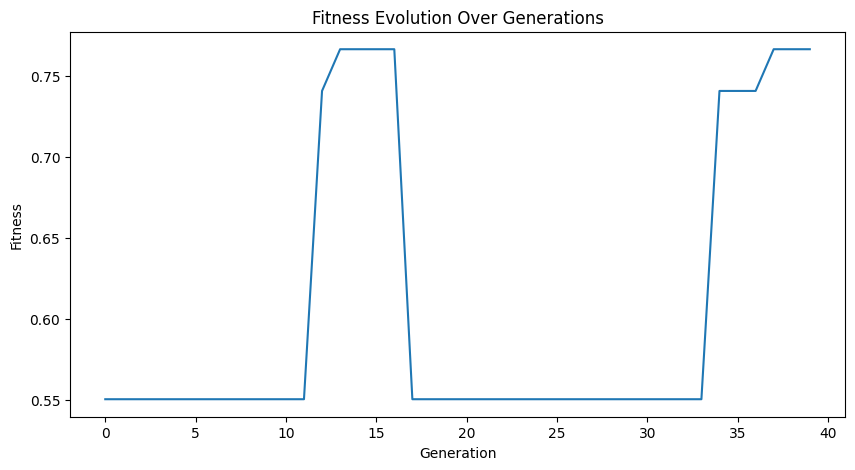

In [61]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import concurrent.futures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

# Set up the environment for DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generators for the hyperparameters
toolbox.register("max_depth", random.randint, 10, 100)  # Tree depth from 10 to 100
toolbox.register("min_samples_split", random.randint, 8, 50)  # Min samples split from 8 to 50
toolbox.register("min_samples_leaf", random.randint, 50, 150)  # Min samples leaf from 50 to 150
toolbox.register("criterion", random.choice, ["gini", "entropy"])
toolbox.register("splitter", random.choice, ["best", "random"])
toolbox.register("max_features", random.choice, [None, "sqrt", "log2"])
toolbox.register("min_weight_fraction_leaf", lambda: random.uniform(0, 0.5))
toolbox.register("max_leaf_nodes", lambda: random.randint(2, 10000))
toolbox.register("min_impurity_decrease", lambda: random.uniform(0, 5))
toolbox.register("ccp_alpha", lambda: random.uniform(0, 5))

# Structure initializers
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.max_depth, toolbox.min_samples_split, toolbox.min_samples_leaf,
                  toolbox.criterion, toolbox.splitter, toolbox.max_features,
                  toolbox.min_weight_fraction_leaf, toolbox.max_leaf_nodes,
                  toolbox.min_impurity_decrease, toolbox.ccp_alpha), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function
def eval_decision_tree(individual):
    max_depth, min_samples_split, min_samples_leaf, criterion, splitter, \
    max_features, min_weight_fraction_leaf, max_leaf_nodes, min_impurity_decrease, \
    ccp_alpha = individual
    model = DecisionTreeClassifier(max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   criterion=criterion,
                                   splitter=splitter,
                                   max_features=max_features,
                                   min_weight_fraction_leaf=min_weight_fraction_leaf,
                                   max_leaf_nodes=max_leaf_nodes,
                                   min_impurity_decrease=min_impurity_decrease,
                                   ccp_alpha=ccp_alpha,
                                   random_state=42)
    model.fit(X_train, y_train)  # Ensure X_train and y_train are defined
    predictions = model.predict(X_test)  # Ensure X_test is defined
    accuracy = accuracy_score(y_test, predictions)  # Ensure y_test is defined
    return accuracy,

# Custom mutation function adjusted to handle parameters correctly
def custom_mutate(individual, numeric_bounds, categorical_choices, indpb):
    for i in range(len(individual)):
        if random.random() < indpb:
            if i in [0, 1, 2]:  # Numeric parameters with integer bounds: max_depth, min_samples_split, min_samples_leaf
                low, up = numeric_bounds[i]
                individual[i] = random.randint(low, up)
            elif i in [3, 4, 5]:  # Categorical parameters: criterion, splitter, max_features
                individual[i] = random.choice(categorical_choices[i - 3])
            elif i == 6:  # min_weight_fraction_leaf, a floating point within [0, 0.5]
                individual[i] = random.uniform(0, 0.5)
            elif i == 7:  # max_leaf_nodes, an integer from 2 to 10000
                individual[i] = random.randint(2, 10000)
            elif i in [8, 9]:  # min_impurity_decrease and ccp_alpha, floating points within [0, 5]
                individual[i] = random.uniform(0, 5)
    return individual,


# Genetic operators
toolbox.register("evaluate", eval_decision_tree)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", custom_mutate, numeric_bounds=[(10, 100), (8, 50), (50, 150)],
                 categorical_choices=[["gini", "entropy"], ["best", "random"], [None, "sqrt", "log2"]], indpb=0.75)
toolbox.register("select", tools.selTournament, tournsize=30)

# Evolutionary operations function
def perform_evolutionary_operations():
    population = toolbox.population(n=50)
    best_fitnesses = []
    stagnant_generations = 0
    best_fitness = 0

    with concurrent.futures.ThreadPoolExecutor() as executor:
        for gen in tqdm(range(40), desc="Generation"):
            offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.75)
            fits = list(executor.map(toolbox.evaluate, offspring))
            for fit, ind in zip(fits, offspring):
                ind.fitness.values = fit

            population = toolbox.select(offspring, len(offspring))
            current_best = tools.selBest(population, 1)[0]
            best_fitnesses.append(current_best.fitness.values[0])


            print(f'Generation {gen+1}, Best individual fitness: {current_best.fitness.values[0]}')
            print("max_depth:", current_best[0])
            print("min_samples_split:", current_best[1])
            print("min_samples_leaf:", current_best[2])
            print("criterion:", current_best[3])
            print("splitter:", current_best[4])
            print("max_features:", current_best[5])
            print("min_weight_fraction_leaf:", current_best[6])
            print("max_leaf_nodes:", current_best[7])
            print("min_impurity_decrease:", current_best[8])
            print("ccp_alpha:", current_best[9])

            if current_best.fitness.values[0] > best_fitness:
                best_fitness = current_best.fitness.values[0]
                stagnant_generations = 0
            else:
                stagnant_generations += 1

            if stagnant_generations >= 3:
                print("Restarting due to stagnant fitness...")
                population = toolbox.population(n=100)  # Re-initialize the population
                best_fitness = 0
                stagnant_generations = 0

    return population, best_fitnesses

# Run the evolutionary algorithm
final_population, fitness_history = perform_evolutionary_operations()
top_individual = tools.selBest(final_population, 1)[0]
print('Best Individual:', top_individual)
print('Best Fitness:', top_individual.fitness.values[0])

# Plot the fitness history
plt.figure(figsize=(10, 5))
plt.plot(fitness_history)
plt.title('Fitness Evolution Over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()


/home/hashim/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/hashim/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
Generation:   1%|          | 1/100 [00:03<05:39,  3.43s/it]

Generation 1, Best Fitness: 0.5506000097167566
max_depth: 68 min_samples_split 26 min_samples_leaf 82 criterion entropy splitter random max_features sqrt min_weight_fraction_leaf 0.4125590087549978 max_leaf_nodes 7393 min_impurity_decrease 1.6225762452761279 ccp_alpha 3.2741174001002293


Generation:   2%|▏         | 2/100 [00:06<05:44,  3.51s/it]

Generation 2, Best Fitness: 0.5506000097167566
max_depth: 10 min_samples_split 45 min_samples_leaf 51 criterion entropy splitter random max_features None min_weight_fraction_leaf 0.17664990881345938 max_leaf_nodes 351 min_impurity_decrease 4.768752593113967 ccp_alpha 3.2218199781104104


Generation:   3%|▎         | 3/100 [00:10<05:19,  3.30s/it]

Generation 3, Best Fitness: 0.5506000097167566
max_depth: 68 min_samples_split 30 min_samples_leaf 82 criterion entropy splitter random max_features sqrt min_weight_fraction_leaf 0.24163899051911913 max_leaf_nodes 7393 min_impurity_decrease 1.6225762452761279 ccp_alpha 4.741027941743988


Generation:   4%|▍         | 4/100 [00:13<05:13,  3.27s/it]

Restarting due to stagnant fitness after 4 generations.
Generation 4, Best Fitness: 0.5506000097167566
max_depth: 91 min_samples_split 45 min_samples_leaf 90 criterion gini splitter random max_features sqrt min_weight_fraction_leaf 0.2925625215680339 max_leaf_nodes 6955 min_impurity_decrease 3.6146711028296847 ccp_alpha 2.270626031131102


Generation:   5%|▌         | 5/100 [00:16<05:08,  3.25s/it]

Generation 5, Best Fitness: 0.5506000097167566
max_depth: 57 min_samples_split 46 min_samples_leaf 84 criterion gini splitter random max_features None min_weight_fraction_leaf 0.19908788570548142 max_leaf_nodes 3190 min_impurity_decrease 1.67019219299681 ccp_alpha 1.4604185096741507


Generation:   6%|▌         | 6/100 [00:19<04:55,  3.14s/it]

Generation 6, Best Fitness: 0.5506000097167566
max_depth: 57 min_samples_split 26 min_samples_leaf 60 criterion entropy splitter random max_features None min_weight_fraction_leaf 0.10654696755555726 max_leaf_nodes 5674 min_impurity_decrease 0.2864246083815003 ccp_alpha 3.5667931255861913


Generation:   7%|▋         | 7/100 [00:22<04:55,  3.18s/it]

Restarting due to stagnant fitness after 7 generations.
Generation 7, Best Fitness: 0.5506000097167566
max_depth: 31 min_samples_split 26 min_samples_leaf 116 criterion gini splitter random max_features None min_weight_fraction_leaf 0.38580005348629665 max_leaf_nodes 3225 min_impurity_decrease 4.1604546825536834 ccp_alpha 0.06880485494263511


Generation:   8%|▊         | 8/100 [00:25<04:43,  3.08s/it]

Generation 8, Best Fitness: 0.5506000097167566
max_depth: 41 min_samples_split 13 min_samples_leaf 116 criterion gini splitter random max_features None min_weight_fraction_leaf 0.3900608323048917 max_leaf_nodes 9198 min_impurity_decrease 0.7721213151941081 ccp_alpha 0.3420375023458361


Generation:   9%|▉         | 9/100 [00:28<04:38,  3.06s/it]

Generation 9, Best Fitness: 0.5506000097167566
max_depth: 33 min_samples_split 49 min_samples_leaf 127 criterion entropy splitter random max_features log2 min_weight_fraction_leaf 0.004088673512938568 max_leaf_nodes 559 min_impurity_decrease 1.0423370365724098 ccp_alpha 1.0493658440584146


Generation:  10%|█         | 10/100 [00:31<04:30,  3.00s/it]

Restarting due to stagnant fitness after 10 generations.
Generation 10, Best Fitness: 0.5506000097167566
max_depth: 33 min_samples_split 49 min_samples_leaf 127 criterion entropy splitter random max_features None min_weight_fraction_leaf 0.3788980077257893 max_leaf_nodes 304 min_impurity_decrease 0.1373363188650989 ccp_alpha 1.0493658440584146


Generation:  11%|█         | 11/100 [00:34<04:30,  3.04s/it]

Generation 11, Best Fitness: 0.5506000097167566
max_depth: 84 min_samples_split 22 min_samples_leaf 62 criterion entropy splitter best max_features log2 min_weight_fraction_leaf 0.05257387822536347 max_leaf_nodes 3178 min_impurity_decrease 4.219633855069892 ccp_alpha 4.5362955798006315


Generation:  12%|█▏        | 12/100 [00:38<04:43,  3.22s/it]

Generation 12, Best Fitness: 0.5506000097167566
max_depth: 75 min_samples_split 10 min_samples_leaf 88 criterion gini splitter random max_features None min_weight_fraction_leaf 0.3699618449088578 max_leaf_nodes 6933 min_impurity_decrease 3.211972477209532 ccp_alpha 1.2415489984108519


Generation:  13%|█▎        | 13/100 [00:41<04:34,  3.16s/it]

Restarting due to stagnant fitness after 13 generations.
Generation 13, Best Fitness: 0.5506000097167566
max_depth: 73 min_samples_split 19 min_samples_leaf 118 criterion entropy splitter best max_features sqrt min_weight_fraction_leaf 0.16668072417823715 max_leaf_nodes 8634 min_impurity_decrease 1.3940149206313224 ccp_alpha 0.25401876730435535


Generation:  14%|█▍        | 14/100 [00:44<04:38,  3.24s/it]

Generation 14, Best Fitness: 0.5506000097167566
max_depth: 22 min_samples_split 41 min_samples_leaf 64 criterion gini splitter random max_features sqrt min_weight_fraction_leaf 0.44788595908511536 max_leaf_nodes 2986 min_impurity_decrease 2.725730232997752 ccp_alpha 1.811335782175132


Generation:  15%|█▌        | 15/100 [00:48<04:47,  3.38s/it]

Generation 15, Best Fitness: 0.5506000097167566
max_depth: 40 min_samples_split 8 min_samples_leaf 85 criterion gini splitter random max_features sqrt min_weight_fraction_leaf 0.44788595908511536 max_leaf_nodes 328 min_impurity_decrease 4.453323309045285 ccp_alpha 1.0584527129044607


Generation:  16%|█▌        | 16/100 [00:51<04:45,  3.39s/it]

Restarting due to stagnant fitness after 16 generations.
Generation 16, Best Fitness: 0.5506000097167566
max_depth: 35 min_samples_split 23 min_samples_leaf 124 criterion gini splitter best max_features None min_weight_fraction_leaf 0.2635601727295973 max_leaf_nodes 7114 min_impurity_decrease 2.6241874421000033 ccp_alpha 1.517379724718696


Generation:  17%|█▋        | 17/100 [00:55<04:49,  3.49s/it]

Generation 17, Best Fitness: 0.5506000097167566
max_depth: 27 min_samples_split 14 min_samples_leaf 74 criterion entropy splitter best max_features sqrt min_weight_fraction_leaf 0.22912368649638565 max_leaf_nodes 7318 min_impurity_decrease 3.1981320191273883 ccp_alpha 3.335273298419248


Generation:  18%|█▊        | 18/100 [00:58<04:43,  3.46s/it]

Generation 18, Best Fitness: 0.5506000097167566
max_depth: 76 min_samples_split 30 min_samples_leaf 144 criterion gini splitter random max_features None min_weight_fraction_leaf 0.49772651118536265 max_leaf_nodes 3773 min_impurity_decrease 4.235228233607206 ccp_alpha 4.324411007664655


Generation:  19%|█▉        | 19/100 [01:02<04:44,  3.51s/it]

Restarting due to stagnant fitness after 19 generations.
Generation 19, Best Fitness: 0.5506000097167566
max_depth: 99 min_samples_split 43 min_samples_leaf 98 criterion gini splitter random max_features None min_weight_fraction_leaf 0.15521377141857606 max_leaf_nodes 4416 min_impurity_decrease 3.8489257176944425 ccp_alpha 2.416863700570189


Generation:  20%|██        | 20/100 [01:05<04:33,  3.42s/it]

Generation 20, Best Fitness: 0.5506000097167566
max_depth: 30 min_samples_split 28 min_samples_leaf 83 criterion entropy splitter random max_features sqrt min_weight_fraction_leaf 0.2704634631388074 max_leaf_nodes 9674 min_impurity_decrease 4.393874083709517 ccp_alpha 0.93879162305683


Generation:  21%|██        | 21/100 [01:09<04:36,  3.50s/it]

Generation 21, Best Fitness: 0.5506000097167566
max_depth: 81 min_samples_split 20 min_samples_leaf 126 criterion gini splitter best max_features sqrt min_weight_fraction_leaf 0.24005378468428223 max_leaf_nodes 5903 min_impurity_decrease 0.09014015308554113 ccp_alpha 4.409257907755128


Generation:  22%|██▏       | 22/100 [01:12<04:35,  3.53s/it]

Restarting due to stagnant fitness after 22 generations.
Generation 22, Best Fitness: 0.5506000097167566
max_depth: 96 min_samples_split 24 min_samples_leaf 126 criterion entropy splitter best max_features sqrt min_weight_fraction_leaf 0.29539874266715954 max_leaf_nodes 276 min_impurity_decrease 0.2768668810816727 ccp_alpha 4.506170790894811


Generation:  23%|██▎       | 23/100 [01:16<04:34,  3.57s/it]

Generation 23, Best Fitness: 0.5506000097167566
max_depth: 22 min_samples_split 31 min_samples_leaf 102 criterion gini splitter random max_features log2 min_weight_fraction_leaf 0.1121157441302531 max_leaf_nodes 2808 min_impurity_decrease 3.228760977127364 ccp_alpha 1.9218651001837617


Generation:  24%|██▍       | 24/100 [01:20<04:35,  3.62s/it]

Generation 24, Best Fitness: 0.5506000097167566
max_depth: 44 min_samples_split 43 min_samples_leaf 120 criterion entropy splitter best max_features sqrt min_weight_fraction_leaf 0.2047063046860979 max_leaf_nodes 8451 min_impurity_decrease 4.550659785043304 ccp_alpha 1.7819486570729421


Generation:  25%|██▌       | 25/100 [01:24<04:34,  3.66s/it]

Restarting due to stagnant fitness after 25 generations.
Generation 25, Best Fitness: 0.5506000097167566
max_depth: 44 min_samples_split 43 min_samples_leaf 120 criterion entropy splitter best max_features sqrt min_weight_fraction_leaf 0.18229682596050079 max_leaf_nodes 7881 min_impurity_decrease 4.815410995756858 ccp_alpha 4.149375029716041


Generation:  26%|██▌       | 26/100 [01:27<04:34,  3.71s/it]

Generation 26, Best Fitness: 0.5506000097167566
max_depth: 60 min_samples_split 23 min_samples_leaf 144 criterion gini splitter random max_features None min_weight_fraction_leaf 0.1187602468181072 max_leaf_nodes 2931 min_impurity_decrease 2.9995348577878262 ccp_alpha 2.5226574414913583


Generation:  27%|██▋       | 27/100 [01:31<04:37,  3.81s/it]

Generation 27, Best Fitness: 0.5506000097167566
max_depth: 45 min_samples_split 41 min_samples_leaf 50 criterion gini splitter best max_features None min_weight_fraction_leaf 0.0676394185993126 max_leaf_nodes 6213 min_impurity_decrease 1.771221798853032 ccp_alpha 2.237097504794031


Generation:  28%|██▊       | 28/100 [01:36<04:42,  3.92s/it]

Restarting due to stagnant fitness after 28 generations.
Generation 28, Best Fitness: 0.5506000097167566
max_depth: 15 min_samples_split 9 min_samples_leaf 66 criterion entropy splitter random max_features log2 min_weight_fraction_leaf 0.4599582608023094 max_leaf_nodes 3181 min_impurity_decrease 2.9995348577878262 ccp_alpha 2.7153179964751866


Generation:  29%|██▉       | 29/100 [01:40<04:38,  3.92s/it]

Generation 29, Best Fitness: 0.5506000097167566
max_depth: 98 min_samples_split 39 min_samples_leaf 65 criterion entropy splitter best max_features sqrt min_weight_fraction_leaf 0.10466693349303968 max_leaf_nodes 1878 min_impurity_decrease 1.927017817008549 ccp_alpha 4.384134802266304


Generation:  30%|███       | 30/100 [01:43<04:32,  3.89s/it]

Generation 30, Best Fitness: 0.5506000097167566
max_depth: 45 min_samples_split 41 min_samples_leaf 145 criterion entropy splitter random max_features None min_weight_fraction_leaf 0.40797427762369265 max_leaf_nodes 7098 min_impurity_decrease 2.308894685413651 ccp_alpha 1.6776761965646387


Generation:  31%|███       | 31/100 [01:47<04:27,  3.88s/it]

Restarting due to stagnant fitness after 31 generations.
Generation 31, Best Fitness: 0.5506000097167566
max_depth: 48 min_samples_split 38 min_samples_leaf 93 criterion entropy splitter best max_features log2 min_weight_fraction_leaf 0.07079548252820445 max_leaf_nodes 4335 min_impurity_decrease 2.963335135535201 ccp_alpha 1.6655875735568904


Generation:  32%|███▏      | 32/100 [01:51<04:25,  3.91s/it]

Generation 32, Best Fitness: 0.5506000097167566
max_depth: 94 min_samples_split 44 min_samples_leaf 72 criterion gini splitter best max_features None min_weight_fraction_leaf 0.3537432706414949 max_leaf_nodes 7591 min_impurity_decrease 4.479880858616623 ccp_alpha 1.591474458418713


Generation:  33%|███▎      | 33/100 [01:55<04:16,  3.83s/it]

Generation 33, Best Fitness: 0.5506000097167566
max_depth: 94 min_samples_split 44 min_samples_leaf 63 criterion gini splitter best max_features None min_weight_fraction_leaf 0.3537432706414949 max_leaf_nodes 7591 min_impurity_decrease 4.479880858616623 ccp_alpha 1.591474458418713


Generation:  34%|███▍      | 34/100 [01:59<04:08,  3.77s/it]

Restarting due to stagnant fitness after 34 generations.
Generation 34, Best Fitness: 0.5506000097167566
max_depth: 42 min_samples_split 36 min_samples_leaf 63 criterion gini splitter best max_features sqrt min_weight_fraction_leaf 0.07415527357332652 max_leaf_nodes 7591 min_impurity_decrease 4.479880858616623 ccp_alpha 1.591474458418713


Generation:  35%|███▌      | 35/100 [02:02<04:00,  3.70s/it]

Generation 35, Best Fitness: 0.5506000097167566
max_depth: 41 min_samples_split 25 min_samples_leaf 79 criterion gini splitter random max_features sqrt min_weight_fraction_leaf 0.14955910383471221 max_leaf_nodes 9689 min_impurity_decrease 1.0114282973986866 ccp_alpha 3.4180498628505465


Generation:  36%|███▌      | 36/100 [02:06<03:54,  3.66s/it]

Generation 36, Best Fitness: 0.5506000097167566
max_depth: 68 min_samples_split 27 min_samples_leaf 52 criterion entropy splitter random max_features log2 min_weight_fraction_leaf 0.38874655220353843 max_leaf_nodes 24 min_impurity_decrease 0.43101064807411216 ccp_alpha 3.2741174001002293


Generation:  37%|███▋      | 37/100 [02:10<03:58,  3.78s/it]

Restarting due to stagnant fitness after 37 generations.
Generation 37, Best Fitness: 0.5506000097167566
max_depth: 11 min_samples_split 23 min_samples_leaf 52 criterion gini splitter best max_features log2 min_weight_fraction_leaf 0.17511911204620367 max_leaf_nodes 4596 min_impurity_decrease 1.2456623588466087 ccp_alpha 3.692611828652119


Generation:  38%|███▊      | 38/100 [02:13<03:50,  3.72s/it]

Generation 38, Best Fitness: 0.5506000097167566
max_depth: 60 min_samples_split 12 min_samples_leaf 77 criterion entropy splitter random max_features sqrt min_weight_fraction_leaf 0.17933926384647797 max_leaf_nodes 2111 min_impurity_decrease 2.019060687510938 ccp_alpha 4.976999183229675


Generation:  39%|███▉      | 39/100 [02:17<03:52,  3.81s/it]

Generation 39, Best Fitness: 0.5506000097167566
max_depth: 14 min_samples_split 36 min_samples_leaf 145 criterion gini splitter best max_features sqrt min_weight_fraction_leaf 0.16887896679701336 max_leaf_nodes 5166 min_impurity_decrease 2.019060687510938 ccp_alpha 1.1467362510241847


Generation:  40%|████      | 40/100 [02:21<03:46,  3.78s/it]

Restarting due to stagnant fitness after 40 generations.
Generation 40, Best Fitness: 0.5506000097167566
max_depth: 40 min_samples_split 25 min_samples_leaf 122 criterion gini splitter random max_features log2 min_weight_fraction_leaf 0.2525452131346173 max_leaf_nodes 4521 min_impurity_decrease 3.4403137488941478 ccp_alpha 1.8239896540856844


Generation:  41%|████      | 41/100 [02:25<03:44,  3.80s/it]

Generation 41, Best Fitness: 0.5506000097167566
max_depth: 20 min_samples_split 19 min_samples_leaf 149 criterion gini splitter best max_features None min_weight_fraction_leaf 0.25323259732199616 max_leaf_nodes 9497 min_impurity_decrease 2.0393759160257545 ccp_alpha 3.2369392209947385


Generation:  42%|████▏     | 42/100 [02:29<03:48,  3.94s/it]

Generation 42, Best Fitness: 0.5506000097167566
max_depth: 45 min_samples_split 35 min_samples_leaf 90 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.1571960968809702 max_leaf_nodes 4417 min_impurity_decrease 4.424855394031061 ccp_alpha 2.2166413475723896


Generation:  43%|████▎     | 43/100 [02:33<03:46,  3.97s/it]

Restarting due to stagnant fitness after 43 generations.
Generation 43, Best Fitness: 0.5506000097167566
max_depth: 75 min_samples_split 16 min_samples_leaf 125 criterion gini splitter random max_features None min_weight_fraction_leaf 0.11190408983116268 max_leaf_nodes 3059 min_impurity_decrease 0.7206736917925538 ccp_alpha 1.557032927768367


Generation:  44%|████▍     | 44/100 [02:37<03:38,  3.90s/it]

Generation 44, Best Fitness: 0.5506000097167566
max_depth: 95 min_samples_split 46 min_samples_leaf 67 criterion gini splitter random max_features None min_weight_fraction_leaf 0.42873145024607184 max_leaf_nodes 1947 min_impurity_decrease 3.75693847274796 ccp_alpha 1.6914301020550067


Generation:  45%|████▌     | 45/100 [02:41<03:31,  3.84s/it]

Generation 45, Best Fitness: 0.5506000097167566
max_depth: 60 min_samples_split 37 min_samples_leaf 109 criterion entropy splitter random max_features log2 min_weight_fraction_leaf 0.4550476475089701 max_leaf_nodes 9109 min_impurity_decrease 2.375620302794548 ccp_alpha 1.351758087134921


Generation:  46%|████▌     | 46/100 [02:44<03:25,  3.81s/it]

Generation 46, Best Fitness: 0.7660326483019968
max_depth: 66 min_samples_split 17 min_samples_leaf 73 criterion entropy splitter random max_features None min_weight_fraction_leaf 0.028085994885342025 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  47%|████▋     | 47/100 [02:49<03:28,  3.93s/it]

Generation 47, Best Fitness: 0.7660326483019968
max_depth: 84 min_samples_split 16 min_samples_leaf 60 criterion gini splitter random max_features None min_weight_fraction_leaf 0.4373220941876183 max_leaf_nodes 3488 min_impurity_decrease 0.48483705222771845 ccp_alpha 0.011866477623739269


Generation:  48%|████▊     | 48/100 [02:53<03:27,  4.00s/it]

Generation 48, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 17 min_samples_leaf 73 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.028085994885342025 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  49%|████▉     | 49/100 [02:57<03:24,  4.00s/it]

Generation 49, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 41 min_samples_leaf 73 criterion entropy splitter best max_features log2 min_weight_fraction_leaf 0.028085994885342025 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  50%|█████     | 50/100 [03:01<03:17,  3.96s/it]

Generation 50, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 17 min_samples_leaf 128 criterion gini splitter best max_features log2 min_weight_fraction_leaf 0.0718059896450135 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  51%|█████     | 51/100 [03:04<03:11,  3.90s/it]

Restarting due to stagnant fitness after 51 generations.
Generation 51, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 41 min_samples_leaf 73 criterion entropy splitter best max_features log2 min_weight_fraction_leaf 0.0718059896450135 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  52%|█████▏    | 52/100 [03:08<03:03,  3.81s/it]

Generation 52, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 17 min_samples_leaf 73 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.3779914485116639 max_leaf_nodes 3988 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  53%|█████▎    | 53/100 [03:11<02:54,  3.72s/it]

Generation 53, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 17 min_samples_leaf 73 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.3779914485116639 max_leaf_nodes 3988 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  54%|█████▍    | 54/100 [03:15<02:54,  3.79s/it]

Restarting due to stagnant fitness after 54 generations.
Generation 54, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 17 min_samples_leaf 73 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.13842304480704393 max_leaf_nodes 3988 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  55%|█████▌    | 55/100 [03:19<02:54,  3.87s/it]

Generation 55, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 50 min_samples_leaf 56 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.028085994885342025 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  56%|█████▌    | 56/100 [03:23<02:52,  3.92s/it]

Generation 56, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 50 min_samples_leaf 56 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.028085994885342025 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  57%|█████▋    | 57/100 [03:28<03:02,  4.24s/it]

Restarting due to stagnant fitness after 57 generations.
Generation 57, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 50 min_samples_leaf 56 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.028085994885342025 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  58%|█████▊    | 58/100 [03:32<02:54,  4.16s/it]

Generation 58, Best Fitness: 0.7663241509983967
max_depth: 64 min_samples_split 22 min_samples_leaf 101 criterion entropy splitter random max_features log2 min_weight_fraction_leaf 0.04076657747114115 max_leaf_nodes 581 min_impurity_decrease 4.048337189149722 ccp_alpha 2.1239441666538954


Generation:  59%|█████▉    | 59/100 [03:36<02:47,  4.09s/it]

Generation 59, Best Fitness: 0.7663241509983967
max_depth: 31 min_samples_split 33 min_samples_leaf 135 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.4748120475217045 max_leaf_nodes 3561 min_impurity_decrease 2.9497372713534693 ccp_alpha 3.2219665958491506


Generation:  60%|██████    | 60/100 [03:41<02:44,  4.12s/it]

Restarting due to stagnant fitness after 60 generations.
Generation 60, Best Fitness: 0.7663241509983967
max_depth: 55 min_samples_split 13 min_samples_leaf 108 criterion entropy splitter random max_features sqrt min_weight_fraction_leaf 0.03716886660956831 max_leaf_nodes 8468 min_impurity_decrease 3.781174519411508 ccp_alpha 4.036448318204769


Generation:  61%|██████    | 61/100 [03:45<02:39,  4.10s/it]

Generation 61, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 17 min_samples_leaf 73 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.028085994885342025 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  62%|██████▏   | 62/100 [03:48<02:33,  4.03s/it]

Generation 62, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 13 min_samples_leaf 126 criterion entropy splitter best max_features sqrt min_weight_fraction_leaf 0.06378727527114919 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  63%|██████▎   | 63/100 [03:52<02:28,  4.02s/it]

Restarting due to stagnant fitness after 63 generations.
Generation 63, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 17 min_samples_leaf 73 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.028085994885342025 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  64%|██████▍   | 64/100 [03:56<02:19,  3.87s/it]

Generation 64, Best Fitness: 0.7663241509983967
max_depth: 26 min_samples_split 32 min_samples_leaf 54 criterion entropy splitter best max_features log2 min_weight_fraction_leaf 0.19729401461395596 max_leaf_nodes 4199 min_impurity_decrease 0.02897613807297028 ccp_alpha 0.3541774146247406


Generation:  65%|██████▌   | 65/100 [04:00<02:12,  3.77s/it]

Generation 65, Best Fitness: 0.7663241509983967
max_depth: 26 min_samples_split 32 min_samples_leaf 112 criterion entropy splitter best max_features log2 min_weight_fraction_leaf 0.19729401461395596 max_leaf_nodes 4199 min_impurity_decrease 0.02897613807297028 ccp_alpha 0.3541774146247406


Generation:  66%|██████▌   | 66/100 [04:03<02:02,  3.62s/it]

Restarting due to stagnant fitness after 66 generations.
Generation 66, Best Fitness: 0.7663241509983967
max_depth: 38 min_samples_split 42 min_samples_leaf 51 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.44776033677489674 max_leaf_nodes 6735 min_impurity_decrease 3.9451053443039683 ccp_alpha 3.9681764436821494


Generation:  67%|██████▋   | 67/100 [04:07<02:02,  3.72s/it]

Generation 67, Best Fitness: 0.7663241509983967
max_depth: 54 min_samples_split 32 min_samples_leaf 87 criterion gini splitter random max_features sqrt min_weight_fraction_leaf 0.4451255044744057 max_leaf_nodes 328 min_impurity_decrease 2.563368522865974 ccp_alpha 1.886611409713418


Generation:  68%|██████▊   | 68/100 [04:10<01:54,  3.58s/it]

Generation 68, Best Fitness: 0.7663241509983967
max_depth: 19 min_samples_split 41 min_samples_leaf 115 criterion gini splitter random max_features None min_weight_fraction_leaf 0.3364920916835848 max_leaf_nodes 3161 min_impurity_decrease 3.8266466436270057 ccp_alpha 4.153687215069551


Generation:  69%|██████▉   | 69/100 [04:13<01:49,  3.53s/it]

Restarting due to stagnant fitness after 69 generations.
Generation 69, Best Fitness: 0.7663241509983967
max_depth: 98 min_samples_split 44 min_samples_leaf 97 criterion gini splitter best max_features log2 min_weight_fraction_leaf 0.12323257151378109 max_leaf_nodes 4286 min_impurity_decrease 1.894937138290445 ccp_alpha 3.4188325006571576


Generation:  70%|███████   | 70/100 [04:17<01:50,  3.70s/it]

Generation 70, Best Fitness: 0.7663241509983967
max_depth: 88 min_samples_split 28 min_samples_leaf 140 criterion gini splitter random max_features log2 min_weight_fraction_leaf 0.08289177344374188 max_leaf_nodes 7315 min_impurity_decrease 2.3449642407648947 ccp_alpha 4.863435327904736


Generation:  71%|███████   | 71/100 [04:21<01:44,  3.61s/it]

Generation 71, Best Fitness: 0.7663241509983967
max_depth: 29 min_samples_split 12 min_samples_leaf 55 criterion gini splitter best max_features None min_weight_fraction_leaf 0.16923644681163602 max_leaf_nodes 2626 min_impurity_decrease 4.571837852847026 ccp_alpha 0.20219444316503687


Generation:  72%|███████▏  | 72/100 [04:24<01:38,  3.52s/it]

Restarting due to stagnant fitness after 72 generations.
Generation 72, Best Fitness: 0.7663241509983967
max_depth: 25 min_samples_split 31 min_samples_leaf 111 criterion entropy splitter random max_features sqrt min_weight_fraction_leaf 0.3514321096730782 max_leaf_nodes 9299 min_impurity_decrease 3.626907666640577 ccp_alpha 3.037631361513567


Generation:  73%|███████▎  | 73/100 [04:28<01:33,  3.47s/it]

Generation 73, Best Fitness: 0.7663241509983967
max_depth: 31 min_samples_split 24 min_samples_leaf 73 criterion entropy splitter random max_features None min_weight_fraction_leaf 0.03427887916791289 max_leaf_nodes 2205 min_impurity_decrease 4.492152531857162 ccp_alpha 0.5019368989529893


Generation:  74%|███████▍  | 74/100 [04:31<01:30,  3.47s/it]

Generation 74, Best Fitness: 0.7663241509983967
max_depth: 40 min_samples_split 42 min_samples_leaf 58 criterion gini splitter random max_features log2 min_weight_fraction_leaf 0.2799601934232579 max_leaf_nodes 4457 min_impurity_decrease 2.8421406800590994 ccp_alpha 4.937587944652346


Generation:  75%|███████▌  | 75/100 [04:34<01:22,  3.31s/it]

Restarting due to stagnant fitness after 75 generations.
Generation 75, Best Fitness: 0.7663241509983967
max_depth: 86 min_samples_split 48 min_samples_leaf 57 criterion gini splitter random max_features sqrt min_weight_fraction_leaf 0.442889672995456 max_leaf_nodes 9477 min_impurity_decrease 4.665464956291141 ccp_alpha 3.2848794557523915


Generation:  76%|███████▌  | 76/100 [04:37<01:20,  3.35s/it]

Generation 76, Best Fitness: 0.7663241509983967
max_depth: 67 min_samples_split 9 min_samples_leaf 67 criterion gini splitter random max_features sqrt min_weight_fraction_leaf 0.494687350408602 max_leaf_nodes 4889 min_impurity_decrease 4.015773957872259 ccp_alpha 4.92879595119914


Generation:  77%|███████▋  | 77/100 [04:41<01:19,  3.45s/it]

Generation 77, Best Fitness: 0.7663241509983967
max_depth: 88 min_samples_split 9 min_samples_leaf 135 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.29800925479080514 max_leaf_nodes 3024 min_impurity_decrease 1.2210122507171761 ccp_alpha 0.4981441721495816


Generation:  78%|███████▊  | 78/100 [04:45<01:21,  3.70s/it]

Restarting due to stagnant fitness after 78 generations.
Generation 78, Best Fitness: 0.7663241509983967
max_depth: 21 min_samples_split 31 min_samples_leaf 106 criterion entropy splitter random max_features None min_weight_fraction_leaf 0.1967819481362122 max_leaf_nodes 5969 min_impurity_decrease 4.643541613452994 ccp_alpha 0.5542688777959759


Generation:  79%|███████▉  | 79/100 [04:49<01:17,  3.68s/it]

Generation 79, Best Fitness: 0.7663241509983967
max_depth: 17 min_samples_split 47 min_samples_leaf 54 criterion entropy splitter best max_features sqrt min_weight_fraction_leaf 0.20638535323021445 max_leaf_nodes 2627 min_impurity_decrease 4.930397061980857 ccp_alpha 3.206549060565625


Generation:  80%|████████  | 80/100 [04:52<01:12,  3.61s/it]

Generation 80, Best Fitness: 0.7663241509983967
max_depth: 69 min_samples_split 10 min_samples_leaf 140 criterion entropy splitter random max_features sqrt min_weight_fraction_leaf 0.3623735352864339 max_leaf_nodes 4079 min_impurity_decrease 1.752458067365879 ccp_alpha 1.2543072914338231


Generation:  81%|████████  | 81/100 [04:56<01:07,  3.57s/it]

Restarting due to stagnant fitness after 81 generations.
Generation 81, Best Fitness: 0.7663241509983967
max_depth: 27 min_samples_split 28 min_samples_leaf 128 criterion gini splitter random max_features sqrt min_weight_fraction_leaf 0.05975749961293786 max_leaf_nodes 2627 min_impurity_decrease 2.9335083916823863 ccp_alpha 1.3624249396076311


Generation:  82%|████████▏ | 82/100 [05:00<01:09,  3.87s/it]

Generation 82, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 17 min_samples_leaf 73 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.028085994885342025 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  83%|████████▎ | 83/100 [05:04<01:06,  3.90s/it]

Generation 83, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 17 min_samples_leaf 91 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.028085994885342025 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  84%|████████▍ | 84/100 [05:08<01:02,  3.90s/it]

Restarting due to stagnant fitness after 84 generations.
Generation 84, Best Fitness: 0.7663241509983967
max_depth: 14 min_samples_split 31 min_samples_leaf 55 criterion gini splitter random max_features log2 min_weight_fraction_leaf 0.16996858246691238 max_leaf_nodes 767 min_impurity_decrease 3.8263184669760624 ccp_alpha 1.7863582886150224


Generation:  85%|████████▌ | 85/100 [05:12<00:57,  3.83s/it]

Generation 85, Best Fitness: 0.7663241509983967
max_depth: 53 min_samples_split 29 min_samples_leaf 130 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.37744233635534885 max_leaf_nodes 8796 min_impurity_decrease 1.2891251998626978 ccp_alpha 1.2708309337123107


Generation:  86%|████████▌ | 86/100 [05:15<00:52,  3.73s/it]

Generation 86, Best Fitness: 0.7663241509983967
max_depth: 75 min_samples_split 19 min_samples_leaf 70 criterion gini splitter best max_features None min_weight_fraction_leaf 0.46965561029358094 max_leaf_nodes 8036 min_impurity_decrease 0.7301560139540192 ccp_alpha 2.2171591652418874


Generation:  87%|████████▋ | 87/100 [05:19<00:46,  3.61s/it]

Restarting due to stagnant fitness after 87 generations.
Generation 87, Best Fitness: 0.7663241509983967
max_depth: 41 min_samples_split 16 min_samples_leaf 100 criterion gini splitter best max_features log2 min_weight_fraction_leaf 0.3697931081833577 max_leaf_nodes 7511 min_impurity_decrease 4.3108241037596 ccp_alpha 1.590215137745579


Generation:  88%|████████▊ | 88/100 [05:23<00:46,  3.88s/it]

Generation 88, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 12 min_samples_leaf 73 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.028085994885342025 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  89%|████████▉ | 89/100 [05:27<00:43,  3.96s/it]

Generation 89, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 12 min_samples_leaf 73 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.028085994885342025 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  90%|█████████ | 90/100 [05:32<00:41,  4.15s/it]

Restarting due to stagnant fitness after 90 generations.
Generation 90, Best Fitness: 0.7663241509983967
max_depth: 39 min_samples_split 43 min_samples_leaf 73 criterion entropy splitter best max_features log2 min_weight_fraction_leaf 0.028085994885342025 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  91%|█████████ | 91/100 [05:36<00:36,  4.02s/it]

Generation 91, Best Fitness: 0.7663241509983967
max_depth: 15 min_samples_split 17 min_samples_leaf 73 criterion gini splitter best max_features sqrt min_weight_fraction_leaf 0.21103591974940694 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  92%|█████████▏| 92/100 [05:40<00:31,  3.99s/it]

Generation 92, Best Fitness: 0.7663241509983967
max_depth: 15 min_samples_split 33 min_samples_leaf 81 criterion gini splitter best max_features sqrt min_weight_fraction_leaf 0.21103591974940694 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  93%|█████████▎| 93/100 [05:43<00:26,  3.80s/it]

Restarting due to stagnant fitness after 93 generations.
Generation 93, Best Fitness: 0.7663241509983967
max_depth: 15 min_samples_split 17 min_samples_leaf 126 criterion gini splitter best max_features log2 min_weight_fraction_leaf 0.005978438516129669 max_leaf_nodes 7969 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  94%|█████████▍| 94/100 [05:47<00:22,  3.75s/it]

Generation 94, Best Fitness: 0.7663241509983967
max_depth: 29 min_samples_split 39 min_samples_leaf 73 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.10201617142921554 max_leaf_nodes 2906 min_impurity_decrease 2.504856862540197 ccp_alpha 0.7235505007258775


Generation:  95%|█████████▌| 95/100 [05:50<00:17,  3.57s/it]

Generation 95, Best Fitness: 0.7663241509983967
max_depth: 93 min_samples_split 46 min_samples_leaf 89 criterion entropy splitter best max_features log2 min_weight_fraction_leaf 0.009371447065979643 max_leaf_nodes 768 min_impurity_decrease 0.20574849966635333 ccp_alpha 0.17561776256780182


Generation:  96%|█████████▌| 96/100 [05:54<00:14,  3.61s/it]

Restarting due to stagnant fitness after 96 generations.
Generation 96, Best Fitness: 0.7663241509983967
max_depth: 16 min_samples_split 21 min_samples_leaf 62 criterion entropy splitter best max_features sqrt min_weight_fraction_leaf 0.09905439664058208 max_leaf_nodes 6175 min_impurity_decrease 3.6023538511756725 ccp_alpha 1.992553533241599


Generation:  97%|█████████▋| 97/100 [05:57<00:11,  3.70s/it]

Generation 97, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 17 min_samples_leaf 73 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.23887353910816195 max_leaf_nodes 3630 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  98%|█████████▊| 98/100 [06:01<00:07,  3.77s/it]

Generation 98, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 17 min_samples_leaf 73 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.23887353910816195 max_leaf_nodes 3630 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation:  99%|█████████▉| 99/100 [06:05<00:03,  3.81s/it]

Restarting due to stagnant fitness after 99 generations.
Generation 99, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 17 min_samples_leaf 73 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.23887353910816195 max_leaf_nodes 3630 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818


Generation: 100%|██████████| 100/100 [06:10<00:00,  3.70s/it]

Generation 100, Best Fitness: 0.7663241509983967
max_depth: 66 min_samples_split 17 min_samples_leaf 73 criterion entropy splitter best max_features None min_weight_fraction_leaf 0.028085994885342025 max_leaf_nodes 4647 min_impurity_decrease 0.04228979907444641 ccp_alpha 0.19741369152545818
Best Individual: [66, 17, 73, 'entropy', 'best', None, 0.028085994885342025, 4647, 0.04228979907444641, 0.19741369152545818]
Best Fitness: 0.7663241509983967


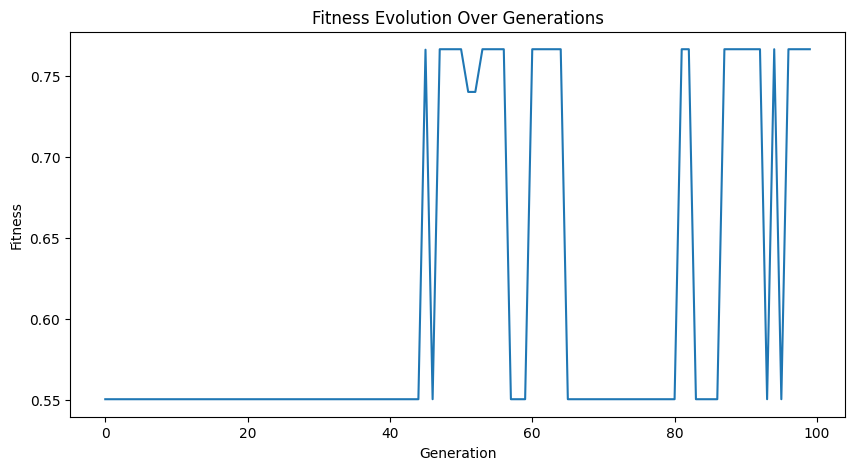

In [66]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import concurrent.futures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

# Set up the environment for DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Attribute generators for the hyperparameters
toolbox.register("max_depth", random.randint, 10, 100)  # Tree depth from 10 to 100
toolbox.register("min_samples_split", random.randint, 8, 50)  # Min samples split from 8 to 50
toolbox.register("min_samples_leaf", random.randint, 50, 150)  # Min samples leaf from 50 to 150
toolbox.register("criterion", random.choice, ["gini", "entropy"])
toolbox.register("splitter", random.choice, ["best", "random"])
toolbox.register("max_features", random.choice, [None, "sqrt", "log2"])
toolbox.register("min_weight_fraction_leaf", lambda: random.uniform(0, 0.5))
toolbox.register("max_leaf_nodes", lambda: random.randint(2, 10000))
toolbox.register("min_impurity_decrease", lambda: random.uniform(0, 5))
toolbox.register("ccp_alpha", lambda: random.uniform(0, 5))

# Structure initializers
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.max_depth, toolbox.min_samples_split, toolbox.min_samples_leaf,
                  toolbox.criterion, toolbox.splitter, toolbox.max_features,
                  toolbox.min_weight_fraction_leaf, toolbox.max_leaf_nodes,
                  toolbox.min_impurity_decrease, toolbox.ccp_alpha), n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function
def eval_decision_tree(individual):
    max_depth, min_samples_split, min_samples_leaf, criterion, splitter, \
    max_features, min_weight_fraction_leaf, max_leaf_nodes, min_impurity_decrease, \
    ccp_alpha = individual
    model = DecisionTreeClassifier(max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   criterion=criterion,
                                   splitter=splitter,
                                   max_features=max_features,
                                   min_weight_fraction_leaf=min_weight_fraction_leaf,
                                   max_leaf_nodes=max_leaf_nodes,
                                   min_impurity_decrease=min_impurity_decrease,
                                   ccp_alpha=ccp_alpha,
                                   random_state=42)
    model.fit(X_train, y_train)  # Ensure X_train and y_train are defined
    predictions = model.predict(X_test)  # Ensure X_test is defined
    accuracy = accuracy_score(y_test, predictions)  # Ensure y_test is defined
    return accuracy,

# Custom mutation function adjusted to handle parameters correctly
def custom_mutate(individual, numeric_bounds, categorical_choices, indpb):
    for i in range(len(individual)):
        if random.random() < indpb:
            if i in [0, 1, 2]:  # Numeric parameters with integer bounds: max_depth, min_samples_split, min_samples_leaf
                low, up = numeric_bounds[i]
                individual[i] = random.randint(low, up)
            elif i in [3, 4, 5]:  # Categorical parameters: criterion, splitter, max_features
                individual[i] = random.choice(categorical_choices[i - 3])
            elif i == 6:  # min_weight_fraction_leaf, a floating point within [0, 0.5]
                individual[i] = random.uniform(0, 0.5)
            elif i == 7:  # max_leaf_nodes, an integer from 2 to 10000
                individual[i] = random.randint(2, 10000)
            elif i in [8, 9]:  # min_impurity_decrease and ccp_alpha, floating points within [0, 5]
                individual[i] = random.uniform(0, 5)
    return individual,


# Genetic operators
toolbox.register("evaluate", eval_decision_tree)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", custom_mutate, numeric_bounds=[(10, 100), (8, 50), (50, 150)],
                 categorical_choices=[["gini", "entropy"], ["best", "random"], [None, "sqrt", "log2"]], indpb=0.3)
toolbox.register("select", tools.selTournament, tournsize=3)

def perform_evolutionary_operations():
    population = toolbox.population(n=50)
    best_fitnesses = []
    best_individual = None  # Best individual across all generations
    best_fitness = float('-inf')  # Initialize best fitness as negative infinity

    with concurrent.futures.ThreadPoolExecutor() as executor:
        for gen in tqdm(range(100), desc="Generation"):
            # Evaluate the offspring
            offspring = algorithms.varAnd(population, toolbox, cxpb=0.7, mutpb=0.3)
            fits = list(executor.map(toolbox.evaluate, offspring))
            for fit, ind in zip(fits, offspring):
                ind.fitness.values = fit

            # Update population based on fitness
            population = toolbox.select(offspring, len(offspring))
            current_best = tools.selBest(population, 1)[0]
            best_fitnesses.append(current_best.fitness.values[0])

            # Update the global best individual
            if best_individual is None or current_best.fitness.values[0] > best_fitness:
                best_individual = current_best
                best_fitness = current_best.fitness.values[0]
                stagnant_generations = 0  # Reset stagnation counter
            else:
                stagnant_generations += 1

            # If the population has stagnated, reset with the best individual retained
            if stagnant_generations >= 3:
                print(f"Restarting due to stagnant fitness after {gen+1} generations.")
                population = toolbox.population(n=50 - 1)  # Create new population
                population.append(best_individual)  # Add best individual to the new population
                stagnant_generations = 0  # Reset stagnation counter

            # Print current best status
            print(f'Generation {gen+1}, Best Fitness: {best_fitness}')
            print("max_depth:", current_best[0], "min_samples_split", current_best[1], "min_samples_leaf", current_best[2], "criterion", current_best[3], "splitter", current_best[4], "max_features", current_best[5], "min_weight_fraction_leaf", current_best[6], "max_leaf_nodes", current_best[7], "min_impurity_decrease", current_best[8], "ccp_alpha", current_best[9])


    return population, best_fitnesses, best_individual

# Run the evolutionary algorithm
final_population, fitness_history, top_individual = perform_evolutionary_operations()
print('Best Individual:', top_individual)
print('Best Fitness:', top_individual.fitness.values[0])

# Plot the fitness history
plt.figure(figsize=(10, 5))
plt.plot(fitness_history)
plt.title('Fitness Evolution Over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()

            